# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-15

Tentang dataset:


Objective:



Dataset Name : employee-attrition.csv

Dataset Description : Dataset ini merupakan dataset yang berisi apakah seorang karyawan IBM akan meninggalkan perusahaan atau tidak.

Column  | Description
--- | ---
Age | Usia seorang karyawan
Attrition | Kemungkinan seorang karyawan berhenti
BusinessTravel | Tingkat perjalanan dinas yang dilakukan seorang karyawan
Department | Departemen
DisteanceFromHome | Jarak antara rumah dan kantor (KM)
Education   | Tingkat pendidikan - 1 : Below College  2 : College 3 : Bachelor 4 : Master 5 : Doctor
EducationField | Bidang pendidikan
EmployeeID | Nomor ID Karyawan
Gender | Jenis Kelamin
JobRole | Posisi pekerjaan
JobSatisfaction | Tingkat Kepuasan saat bekerja
MaritalStatus | Status pernikahan
MonthlyIncome | Gaji Perbulan
NumCompaniesWorked | Jumlah perusahaan dimana karyawan tersebut bekerja sebelum bergabung dengan IBM
PercentSalaryHike | Tingkat kenaikan gaji (%)
PerformenceRating | Tingkat kinerja karyawan - 1 : Low 2 : Good 3 : Excellent 4 : Outstanding
TotalWorkingYears | Jumlah tahun seorang karyawan bekerja selama hidupnya
WorkingLifeBalance | Tingkat keseimbangan hidup karyawan antara pekerjaan dan non pekerjaan
YearsAtCompany | Jumlah tahun dimana seorang karyawan berada di IBM
YearsInCurrentRole | Jumlah tahun dimana seorang karyawan menduduki jabatannya saat ini
YearSinceLastPromotion | Jumlah tahun dimana seorang karyawan terakhir kali naik jabatan
YearsWithCurrentManager | 	Jumlah tahun dimana seorang karyawan memiliki manager yang sama


---

# ii. Import Libraries

In [1]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries Data Preprocessing
from sklearn.model_selection import train_test_split # splittingdata
from feature_engine.outliers import Winsorizer # outlier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler # scalling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # encoder
from imblearn.over_sampling import SMOTE # balancing

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Library handling outlier
from feature_engine.outliers import Winsorizer

# Pemodelan ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

from collections import Counter

# lib pipelines
from sklearn.pipeline import Pipeline

# Save model
import pickle
import joblib
import json

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

---

# iii. Data Loading

In [2]:
df = pd.read_csv('datasets/employee-attrition.csv')
df

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0      28        No  Travel_Rarely  Research & Development                 3   
1      37       Yes  Travel_Rarely  Research & Development                11   
2      38        No  Travel_Rarely                   Sales                 2   
3      55       Yes  Travel_Rarely  Research & Development                 2   
4      31        No  Travel_Rarely                   Sales                 5   
...   ...       ...            ...                     ...               ...   
1465   44        No  Travel_Rarely  Research & Development                10   
1466   31        No     Non-Travel                   Sales                 2   
1467   30        No  Travel_Rarely         Human Resources                 1   
1468   50        No  Travel_Rarely  Research & Development                 9   
1469   58       Yes  Travel_Rarely  Research & Development                 2   

      Education EducationField  EmployeeID  Gender                    JobRole  \
0             3        Medical        1121  Female     Manufacturing Director   
1             2        Medical        1033  Female  Healthcare Representative   
2             2      Marketing        1125    Male            Sales Executive   
3             3        Medical         787    Male                    Manager   
4             4  Life Sciences        1673  Female            Sales Executive   
...         ...            ...         ...     ...                        ...   
1465          4          Other          40    Male  Healthcare Representative   
1466          4  Life Sciences        1324  Female            Sales Executive   
1467          3  Life Sciences        1499    Male            Human Resources   
1468          3  Life Sciences        1030    Male      Laboratory Technician   
1469          4  Life Sciences         825    Male          Research Director   

      ... MonthlyIncome NumCompaniesWorked  PercentSalaryHike  \
0     ...          7655                  0                 17   
1     ...          4777                  5                 15   
2     ...          7351                  7                 16   
3     ...         19859                  5                 13   
4     ...          5476                  1                 11   
...   ...           ...                ...                ...   
1465  ...          6465                  2                 13   
1466  ...          9852                  1                 19   
1467  ...          2064                  0                 21   
1468  ...          2380                  4                 18   
1469  ...         19246                  7                 12   

      PerformanceRating  TotalWorkingYears  WorkLifeBalance  YearsAtCompany  \
0                     3                 10             Good               9   
1                     3                 15              Bad               1   
2                     3                 10           Better               1   
3                     3                 24           Better               5   
4                     3                 10           Better              10   
...                 ...                ...              ...             ...   
1465                  3                  9             Best               4   
1466                  3                 10             Good              10   
1467                  4                  6             Best               5   
1468                  3                  8           Better               1   
1469                  3                 40           Better              31   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrentManager  
0                     7                        1                        7  
1                     0                        0                        0  
2                     0                        0                        0  
3                     2               

In [3]:
print('Jumlah Baris: ',df.shape[0])
print('Jumlah Kolom: ',df.shape[1])

Jumlah Baris:  1470
Jumlah Kolom:  22


In [4]:
# Data 5 teratas 
df.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0   28        No  Travel_Rarely  Research & Development                 3   
1   37       Yes  Travel_Rarely  Research & Development                11   
2   38        No  Travel_Rarely                   Sales                 2   
3   55       Yes  Travel_Rarely  Research & Development                 2   
4   31        No  Travel_Rarely                   Sales                 5   

   Education EducationField  EmployeeID  Gender                    JobRole  \
0          3        Medical        1121  Female     Manufacturing Director   
1          2        Medical        1033  Female  Healthcare Representative   
2          2      Marketing        1125    Male            Sales Executive   
3          3        Medical         787    Male                    Manager   
4          4  Life Sciences        1673  Female            Sales Executive   

   ... MonthlyIncome NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0  ...          7655                  0                 17                  3   
1  ...          4777                  5                 15                  3   
2  ...          7351                  7                 16                  3   
3  ...         19859                  5                 13                  3   
4  ...          5476                  1                 11                  3   

   TotalWorkingYears  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                 10             Good               9                  7   
1                 15              Bad               1                  0   
2                 10           Better               1                  0   
3                 24           Better               5                  2   
4                 10           Better              10                  0   

   YearsSinceLastPromotion  YearsWithCurrentManager  
0                        1                        7  
1                        0                        0  
2                        0                        0  
3                        1                        4  
4                        0                        2  

[5 rows x 22 columns]

In [5]:
# Data 5 Terbawah
df.tail().T

1465             1466  \
Age                                             44               31   
Attrition                                       No               No   
BusinessTravel                       Travel_Rarely       Non-Travel   
Department                  Research & Development            Sales   
DistanceFromHome                                10                2   
Education                                        4                4   
EducationField                               Other    Life Sciences   
EmployeeID                                      40             1324   
Gender                                        Male           Female   
JobRole                  Healthcare Representative  Sales Executive   
JobSatisfaction                          Very High             High   
MaritalStatus                              Married         Divorced   
MonthlyIncome                                 6465             9852   
NumCompaniesWorked                               2                1   
PercentSalaryHike                               13               19   
PerformanceRating                                3                3   
TotalWorkingYears                                9               10   
WorkLifeBalance                               Best             Good   
YearsAtCompany                                   4               10   
YearsInCurrentRole                               2                8   
YearsSinceLastPromotion                          1                9   
YearsWithCurrentManager                          3                6   

                                    1467                    1468  \
Age                                   30                      50   
Attrition                             No                      No   
BusinessTravel             Travel_Rarely           Travel_Rarely   
Department               Human Resources  Research & Development   
DistanceFromHome                       1                       9   
Education                              3                       3   
EducationField             Life Sciences           Life Sciences   
EmployeeID                          1499                    1030   
Gender                              Male                    Male   
JobRole                  Human Resources   Laboratory Technician   
JobSatisfaction                     High               Very High   
MaritalStatus                   Divorced                 Married   
MonthlyIncome                       2064                    2380   
NumCompaniesWorked                     0                       4   
PercentSalaryHike                     21                      18   
PerformanceRating                      4                       3   
TotalWorkingYears                      6                       8   
WorkLifeBalance                     Best                  Better   
YearsAtCompany                         5                       1   
YearsInCurrentRole                     3                       0   
YearsSinceLastPromotion                1                       0   
YearsWithCurrentManager                3                       0   

                                           1469  
Age                                          58  
Attrition                                   Yes  
BusinessTravel                    Travel_Rarely  
Department               Research & Development  
DistanceFromHome                              2  
Education                                     4  
EducationField                    Life Sciences  
EmployeeID                                  825  
Gender                                     Male  
JobRole                       Research Director  
JobSatisfaction                          Medium  
MaritalStatus                            Single  
MonthlyIncome                             19246  
NumCompaniesWorked                            7  
PercentSalaryHike                            12  
PerformanceRating                             3

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeID               1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   object
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  PercentSalaryHike        1470 non-null  

Insight:
- Dataset memiliki `1470` jumlah baris dan `22` jumlah kolom
- Data type int64(13), object(9)
- Tidak ada indikasi missing values
- EmployeeID tidak digunakan karena tidak ada informasi yang dapat diambil

In [7]:
df.drop(columns='EmployeeID', inplace=True)

In [8]:
# Getting Data Info 
df.describe(include=np.number)

Age  DistanceFromHome    Education  MonthlyIncome  \
count  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810          9.192517     2.912925    6502.931293   
std       9.135373          8.106864     1.024165    4707.956783   
min      18.000000          1.000000     1.000000    1009.000000   
25%      30.000000          2.000000     2.000000    2911.000000   
50%      36.000000          7.000000     3.000000    4919.000000   
75%      43.000000         14.000000     4.000000    8379.000000   
max      60.000000         29.000000     5.000000   19999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
count        1470.000000     1470.000000         1470.000000   
mean           11.279592        7.008163            4.229252   
std             7.780782        6.126525            3.623137   
min             0.000000        0.000000            0.000000   
25%             6.000000        3.000000            2.000000   
50%            10.000000        5.000000            3.000000   
75%            15.000000        9.000000            7.000000   
max            40.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrentManager  
count              1470.000000              1470.000000  
mean                  2.187755                 4.123129  
std                   3.222430                 3.568136  
min                   0.000000                 0.000000  
25%                   0.000000                 2.000000  
50%                   1.000000                 3.000000  
75%                   3.000000                 7.000000  
max                  15.000000                17.000000

Note:  
Di kolom PercentSalaryHike dengan kenaikan gaji rata - rata 15% dan std yang rendah yaitu 3% menunjukan variasi sekitar itu




memberikan reward kepada karyawan dengan performence 4 dalam kurun waktu tertentu

In [9]:
df.describe(include='object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole JobSatisfaction MaritalStatus WorkLifeBalance  
count              1470            1470          1470            1470  
unique                9               4             3               4  
top     Sales Executive       Very High       Married          Better  
freq                326             459           673             893

Insight:  
Dalam employee attrition variable yang berpengaruh biasanya terdiri dari kenaikan gaji('PercentSalaryHike'), MonthlyIncome dan WorkLifeBalance. Dalam hal ini rata-rata PercentSalaryHike sebesar` 15%`, rata-rata `$6502`, dan kebanyakan WorkLifeBalance `('Better')`. artinya rata-rata karyawan yang keluar tidak ada (No) dan bisa dilihat frekuensi tinggi adalah No


---

# iv. Exploratory Data Analysis (EDA)

In [10]:
# copy dataset
data_analyz = df.copy()

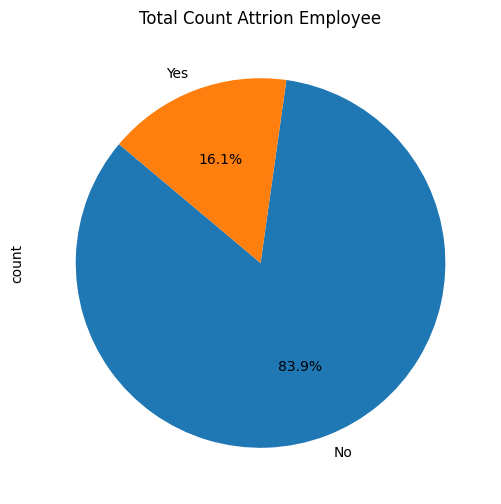

In [11]:
# Distribution Data attration employee
plt.figure(figsize=(8,6))
data_analyz.Attrition.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Count Attrion Employee')
plt.show()


Explanation:

Dari hasil visualisasi menunjukkan Mayoritas Attrion Employee adalah `No` yaitu `83.9%` dan Minoritas `Yes` adalah `16.1%`

In [12]:
# fungsi extract years to month
def convers_toMonth(YearsAtCompany):
    month = YearsAtCompany * 12
    return month

data_analyz['MonthAtCompany'] = data_analyz['YearsAtCompany'].apply(convers_toMonth)

In [13]:
# fungsi klasifikasikan 
def duration_employee_byYears(MonthAtCompany):
    if MonthAtCompany <= 8:
        return 'unsatisfied'
    elif MonthAtCompany <= 18:
        return 'decent'
    elif MonthAtCompany <= 48:
        return 'satisfied'
    elif MonthAtCompany <= 120:
        return 'loyal'
    else:
        return 'devoted'

# Membuat kolom baru dengan hasil filter
data_analyz['duration_employee'] = data_analyz['MonthAtCompany'].apply(duration_employee_byYears)

In [14]:
data_analyz

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0      28        No  Travel_Rarely  Research & Development                 3   
1      37       Yes  Travel_Rarely  Research & Development                11   
2      38        No  Travel_Rarely                   Sales                 2   
3      55       Yes  Travel_Rarely  Research & Development                 2   
4      31        No  Travel_Rarely                   Sales                 5   
...   ...       ...            ...                     ...               ...   
1465   44        No  Travel_Rarely  Research & Development                10   
1466   31        No     Non-Travel                   Sales                 2   
1467   30        No  Travel_Rarely         Human Resources                 1   
1468   50        No  Travel_Rarely  Research & Development                 9   
1469   58       Yes  Travel_Rarely  Research & Development                 2   

      Education EducationField  Gender                    JobRole  \
0             3        Medical  Female     Manufacturing Director   
1             2        Medical  Female  Healthcare Representative   
2             2      Marketing    Male            Sales Executive   
3             3        Medical    Male                    Manager   
4             4  Life Sciences  Female            Sales Executive   
...         ...            ...     ...                        ...   
1465          4          Other    Male  Healthcare Representative   
1466          4  Life Sciences  Female            Sales Executive   
1467          3  Life Sciences    Male            Human Resources   
1468          3  Life Sciences    Male      Laboratory Technician   
1469          4  Life Sciences    Male          Research Director   

     JobSatisfaction  ... PercentSalaryHike  PerformanceRating  \
0             Medium  ...                17                  3   
1             Medium  ...                15                  3   
2             Medium  ...                16                  3   
3                Low  ...                13                  3   
4          Very High  ...                11                  3   
...              ...  ...               ...                ...   
1465       Very High  ...                13                  3   
1466            High  ...                19                  3   
1467            High  ...                21                  4   
1468       Very High  ...                18                  3   
1469          Medium  ...                12                  3   

      TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                    10             Good               9                   7   
1                    15              Bad               1                   0   
2                    10           Better               1                   0   
3                    24           Better               5                   2   
4                    10           Better              10                   0   
...                 ...              ...             ...                 ...   
1465                  9             Best               4                   2   
1466                 10             Good              10                   8   
1467                  6             Best               5                   3   
1468                  8           Better               1                   0   
1469                 40           Better              31                  15   

     YearsSinceLastPromotion  YearsWithCurrentManager  MonthAtCompany  \
0                          1                        7             108   
1                          0                        0              12   
2                          0                        0              12   
3                          1                        4              60   
4                          0                        2             120   
...                     

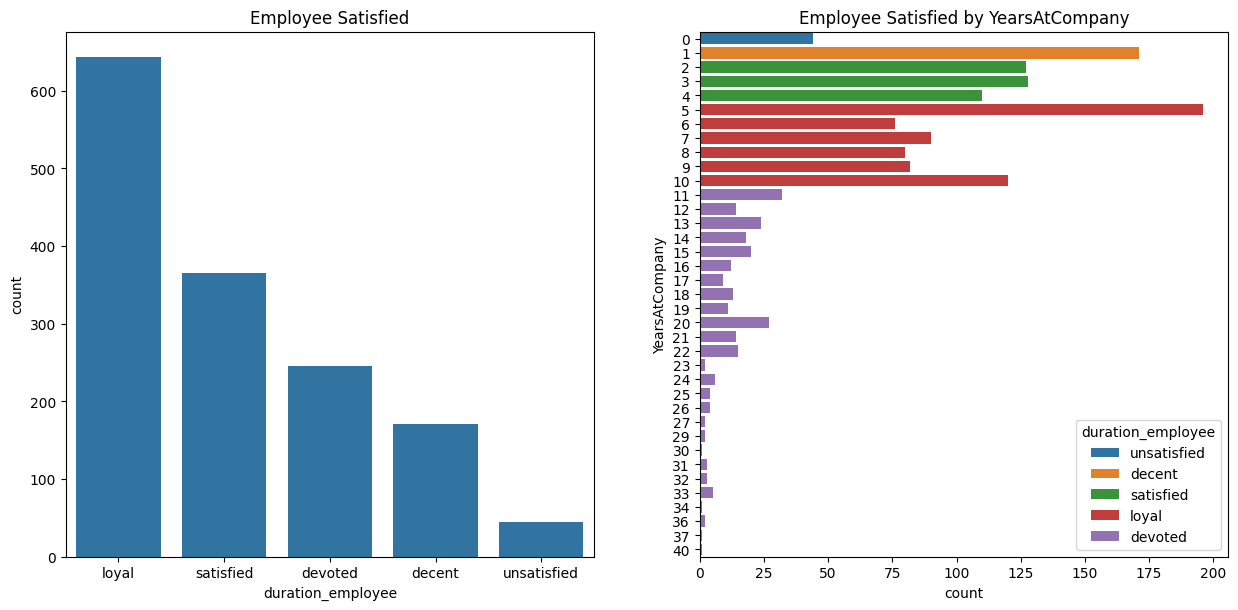

In [15]:
# visualisasi employee satisfied
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
sns.countplot(x = 'duration_employee',
              data = data_analyz,
              order = data_analyz['duration_employee'].value_counts().index)
plt.title('Employee Satisfied')

plt.subplot(2,2,2)
sns.countplot(y = 'YearsAtCompany',
              data = data_analyz, hue='duration_employee')
            #   order = data['YearsAtCompany'].value_counts().index)
plt.title('Employee Satisfied by YearsAtCompany')
plt.show()

explanation:

Dari hasil visual dengan cera mengurutkan yang terbesar ke terkecl dan memfilter berdasarkan tahun bekerja yang mana hasil extarct dari YearsAtCompany sehingga mendapatkan informasi bulan. poin utamanya dari visualisasi loyal mendominasi (bekerja 5-10 tahun), dan karyawan yang kurang puas dengan pekejaannya biasa nya kurang dari 1 tahun

In [16]:
data_analyz['duration_employee'].value_counts()

duration_employee
loyal          644
satisfied      365
devoted        246
decent         171
unsatisfied     44
Name: count, dtype: int64

Insight:

Dari datasets Tingkat loyal yang mendominasi dataset ini dengan jumlah karyawan `644` yang terbanyak dan sudah bekerja` 5-10` tahun di perusahaan, tingkat terendah adalah kurang dari 1 tahun dengan jumlah `44 `karyawan. point utamanya focus pada kategori unsatisfied, decent, dan satisfied dimana keryawan tersebut berpotensi untuk keluar. dan biasaya ada alasan tertentu seperti, gaji tidak sesuai, explore skill, dan lain-lain

In [17]:
data_analyz.describe(include='object')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole JobSatisfaction MaritalStatus WorkLifeBalance  \
count              1470            1470          1470            1470   
unique                9               4             3               4   
top     Sales Executive       Very High       Married          Better   
freq                326             459           673             893   

       duration_employee  
count               1470  
unique                 5  
top                loyal  
freq                 644

In [18]:
mean_monthlyIncome = data_analyz.groupby(by='JobRole')['MonthlyIncome'].mean()
mean_monthlyIncome = mean_monthlyIncome.reset_index()

# Plot using Plotly
fig = px.bar(mean_monthlyIncome, x='JobRole', y='MonthlyIncome', title='Mean Monthly Income by Job Role')
fig.show()

In [22]:
total_incomeByDepartment = df.groupby(by='Department')['MonthlyIncome'].sum().reset_index()
total_incomeByDepartment

Department  MonthlyIncome
0         Human Resources         419234
1  Research & Development        6036284
2                   Sales        3103791

In [23]:
count_incomeByDepartment = df['Department'].value_counts().reset_index()
count_incomeByDepartment

Department  count
0  Research & Development    961
1                   Sales    446
2         Human Resources     63

In [19]:
data_analyz['JobSatisfaction'].value_counts().index

Index(['Very High', 'High', 'Low', 'Medium'], dtype='object', name='JobSatisfaction')

In [47]:
# Menghitung NewPercentSalaryHike berdasarkan formula baru
data_analyz['NewPercentSalaryHike'] = 5 + (data_analyz['PerformanceRating'] * 2) + (data_analyz['YearsAtCompany'] / 5)

In [48]:
# Membandingkan PercentSalaryHike dengan NewPercentSalaryHike
mean_percent_salary_hike = data_analyz['PercentSalaryHike'].mean()
mean_new_percent_salary_hike = data_analyz['NewPercentSalaryHike'].mean()

if mean_new_percent_salary_hike > mean_percent_salary_hike:
    print("Formula baru kemungkinan akan menaikkan tingkat kenaikan gaji dari sebelumnya.")
elif mean_new_percent_salary_hike < mean_percent_salary_hike:
    print("Formula baru kemungkinan akan menurunkan tingkat kenaikan gaji dari sebelumnya.")
else:
    print("Formula baru tidak berpengaruh pada tingkat kenaikan gaji dari sebelumnya.")

Formula baru kemungkinan akan menurunkan tingkat kenaikan gaji dari sebelumnya.


In [49]:
mean_percent_salary_hike

15.209523809523809

In [50]:
mean_new_percent_salary_hike

12.709115646258505

In [51]:
# Analisis terhadap dampak formula baru terhadap retensi karyawan
# Misalnya, kita bisa membandingkan persentase karyawan yang keluar dari perusahaan sebelum dan sesudah implementasi formula baru.
percent_left_before = (data_analyz[data_analyz['Attrition'] == 'Yes'].shape[0] / data_analyz.shape[0]) * 100
data_after_formula = data_analyz.copy()
data_after_formula['PercentSalaryHike'] = data_after_formula['NewPercentSalaryHike']
percent_left_after = (data_after_formula[data_after_formula['Attrition'] == 'Yes'].shape[0] / data_after_formula.shape[0]) * 100

if percent_left_after < percent_left_before:
    print("Formula baru berhasil dalam mencegah sebagian karyawan untuk keluar dari perusahaan.")
else:
    print("Formula baru tidak memiliki dampak yang signifikan terhadap retensi karyawan.")

Formula baru tidak memiliki dampak yang signifikan terhadap retensi karyawan.


In [52]:
percent_left_before

16.122448979591837

In [53]:
percent_left_after

16.122448979591837

Insight : 

Perusahaan meminta untuk membuat formula baru kenaikan gaji dan dampak formula baru terhadap retensi karyawan, dari hasil tersebut formula baru kemungkinan akan menurunkan tingkat kenaikan gaji dari sebelum nya dengan membandingkan rata-rata `PercentSalaryHike` dan` NewPercentSalaryHike`. Serta formula baru tidak memiliki dampak yang signifikan terhadap retensi karyawan. 


---

# v. Feature Engineering

In [54]:
# dump dataset agar tidak mengulang
data = df.copy()

In [55]:
# cek duplicated data
data.duplicated().sum()

0

Tidak ada data terduplikat

In [56]:
# rename 
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

<Figure size 640x480 with 0 Axes>

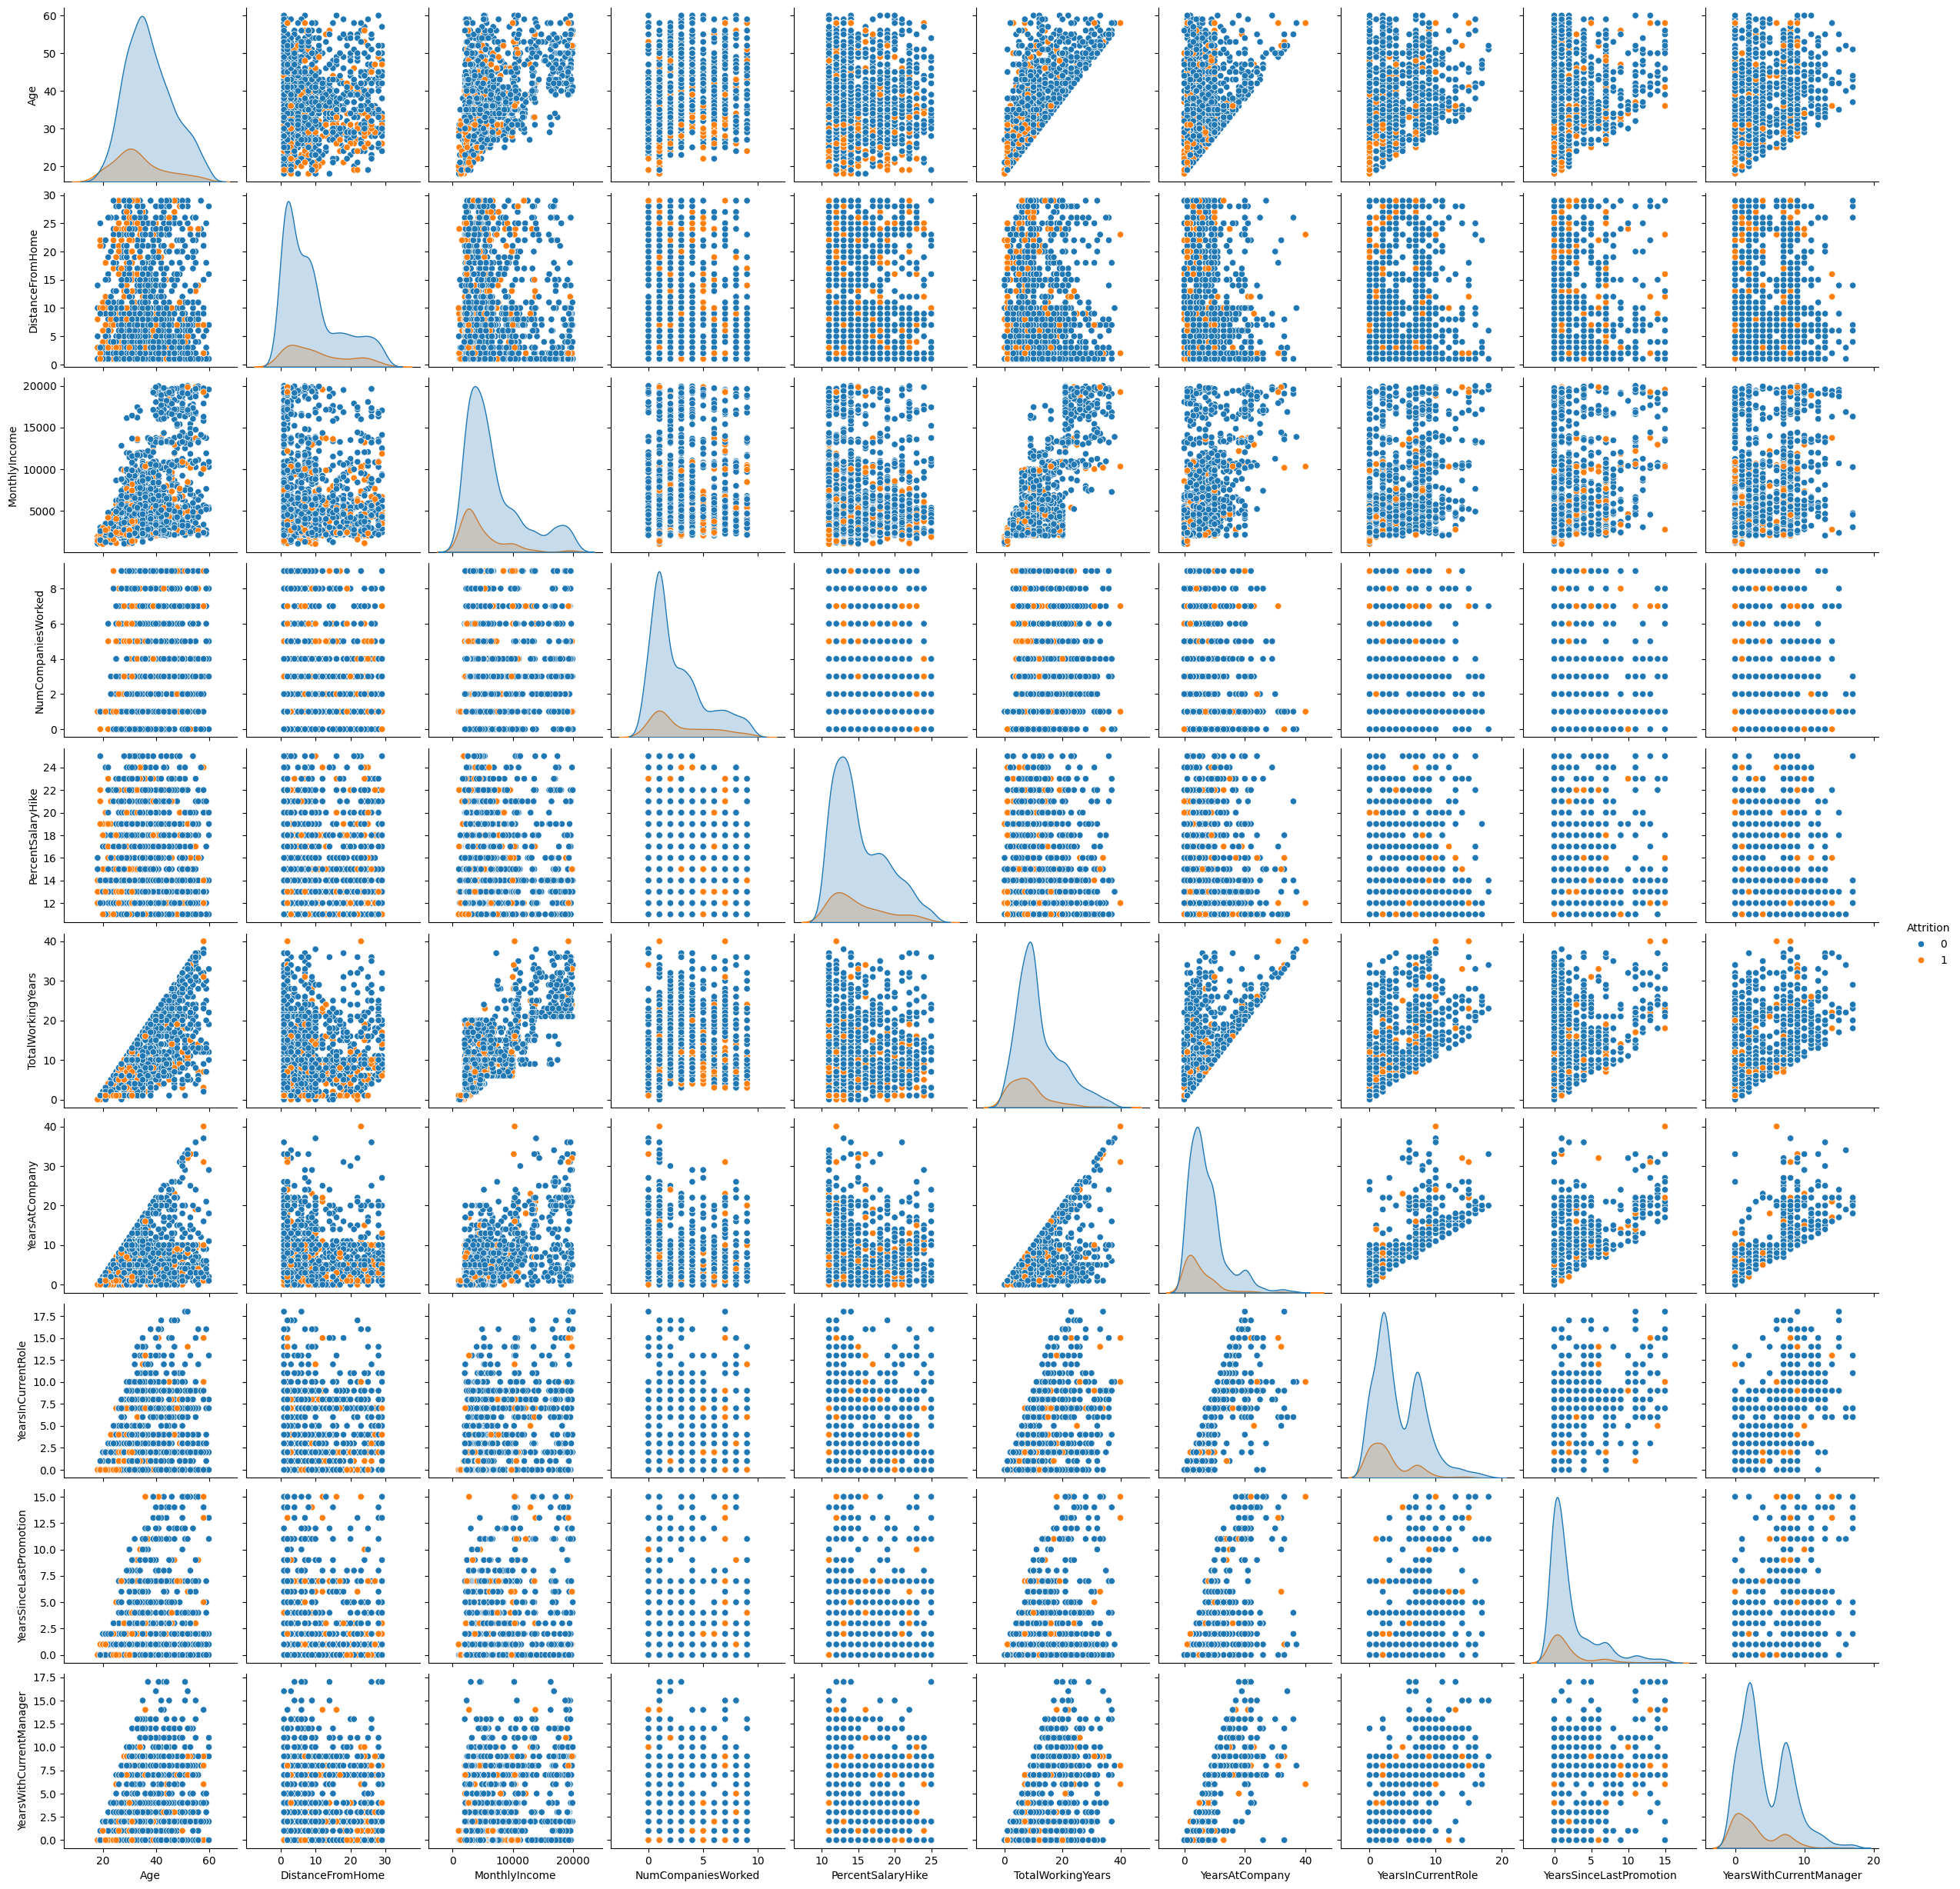

In [57]:
# checking distribution selected feature
to_Plot = ['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager','Attrition']
plt.figure()
sns.pairplot(data[to_Plot],hue='Attrition')  
#Taking hue 
plt.show()

## Spliting Data

In [58]:
# split data feature dan target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [59]:
# Split data Train dan Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
Counter(y_test)

Counter({0: 246, 1: 48})

Dari hasil counter class 0 = No dan 1 = Yes, ini termasuk imbalance sehingga data harus balancing

In [61]:
Counter(y_train)

Counter({0: 987, 1: 189})

Sama halnya dengan data train tidak balance

In [62]:
# Create function sizes chek
def print_data_sizes(X_train, y_train, X_test, y_test):
    print('Train Data')
    print('Ukuran X_train : ', X_train.shape)
    print('Ukuran y_train : ', y_train.shape)
    print('\n')
    print('Test Data')
    print('Ukuran X_test : ', X_test.shape)
    print('Ukuran y_test : ', y_test.shape)


print_data_sizes(X_train, y_train, X_test, y_test)

Train Data
Ukuran X_train :  (1176, 20)
Ukuran y_train :  (1176,)


Test Data
Ukuran X_test :  (294, 20)
Ukuran y_test :  (294,)


## Checking Cardinality

In [63]:
def tampilkan_nilai_unik(data):
    for column in data.columns:
        print(f"{column}: {data[column].unique()}")

In [64]:
# split data list kategorikal dan numerik agar mudah di analisis
cat = X_train.select_dtypes(include=['object']).columns.to_list()
num = X_train.select_dtypes(include=np.number).columns.to_list()

In [65]:
tampilkan_nilai_unik(X_train[cat])

BusinessTravel: ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Department: ['Research & Development' 'Sales' 'Human Resources']
EducationField: ['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
Gender: ['Male' 'Female']
JobRole: ['Laboratory Technician' 'Sales Executive' 'Manufacturing Director'
 'Sales Representative' 'Research Director' 'Research Scientist' 'Manager'
 'Healthcare Representative' 'Human Resources']
JobSatisfaction: ['Very High' 'Low' 'Medium' 'High']
MaritalStatus: ['Married' 'Divorced' 'Single']
WorkLifeBalance: ['Good' 'Best' 'Better' 'Bad']


In [66]:
tampilkan_nilai_unik(X_train[num])

Age: [35 24 31 30 32 37 27 56 42 41 44 40 34 43 29 38 23 33 28 45 55 50 26 59
 53 52 49 54 39 19 21 36 48 20 25 60 47 46 22 51 58 57 18]
DistanceFromHome: [ 7 29  2  9  5 14  3  6 20  8  1  4 25 10 18 17 23 11 22 13 19 21 16 28
 26 12 24 15 27]
Education: [2 1 3 4 5]
MonthlyIncome: [ 2690  3907  6582 ...  2313 19586  6652]
NumCompaniesWorked: [1 4 9 7 0 5 3 8 6 2]
PercentSalaryHike: [18 13 11 14 12 20 16 19 22 21 25 17 24 15 23]
PerformanceRating: [3 4]
TotalWorkingYears: [ 1  6 10 12 18 36  8 16  4 23 20  3 26  7 14  2 17 19 28 32  9 24 33 15
 13 21 11  5 25 31 30 29 38 27 22 35  0 37 40 34]
YearsAtCompany: [ 1  6 12 10 18  7  4 22  3 20 25  8  0  9 14  2 17 13  5 21 15 19 11 24
 29 16 27 37 31 32 36 33 40 26 34 23]
YearsInCurrentRole: [ 0  2  5  9  8  7  3 13 16  6  1 11  4 10 14 17 15 12 18]
YearsSinceLastPromotion: [ 0  1  6  5 12  7  8 11 14  2  4  3 13 15  9 10]
YearsWithCurrentManager: [ 1  2  5 10  3 17  4  7  0 12  8  6 13 15 11  9 14 16]


In [67]:
data.nunique().to_frame().reset_index().rename(columns={'index':'Column',0:'Unique_values'})

Column  Unique_values
0                       Age             43
1                 Attrition              2
2            BusinessTravel              3
3                Department              3
4          DistanceFromHome             29
5                 Education              5
6            EducationField              6
7                    Gender              2
8                   JobRole              9
9           JobSatisfaction              4
10            MaritalStatus              3
11            MonthlyIncome           1349
12       NumCompaniesWorked             10
13        PercentSalaryHike             15
14        PerformanceRating              2
15        TotalWorkingYears             40
16          WorkLifeBalance              4
17           YearsAtCompany             37
18       YearsInCurrentRole             19
19  YearsSinceLastPromotion             16
20  YearsWithCurrentManager             18

Dari check data Cardinality tidak ada pola atau tidak ada yang harus di decrease cardinality karena sudah mewakili semua informasi. Dari Dataframe yang memiliki high cardinality MonthlyIncome, namun untuk MonthlyIncome bisa di kategorikan (high,mid,low) karena kurangnya informasi dan tergantung korelasi jadi abaikan untuk sekarang

## Handling Missing Value

In [68]:
# cek missing values 
X_train.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
dtype: int64

In [69]:
y_train.isnull().sum()

0

Tidak ada missing value yang harus di handle

## Handling Outlier

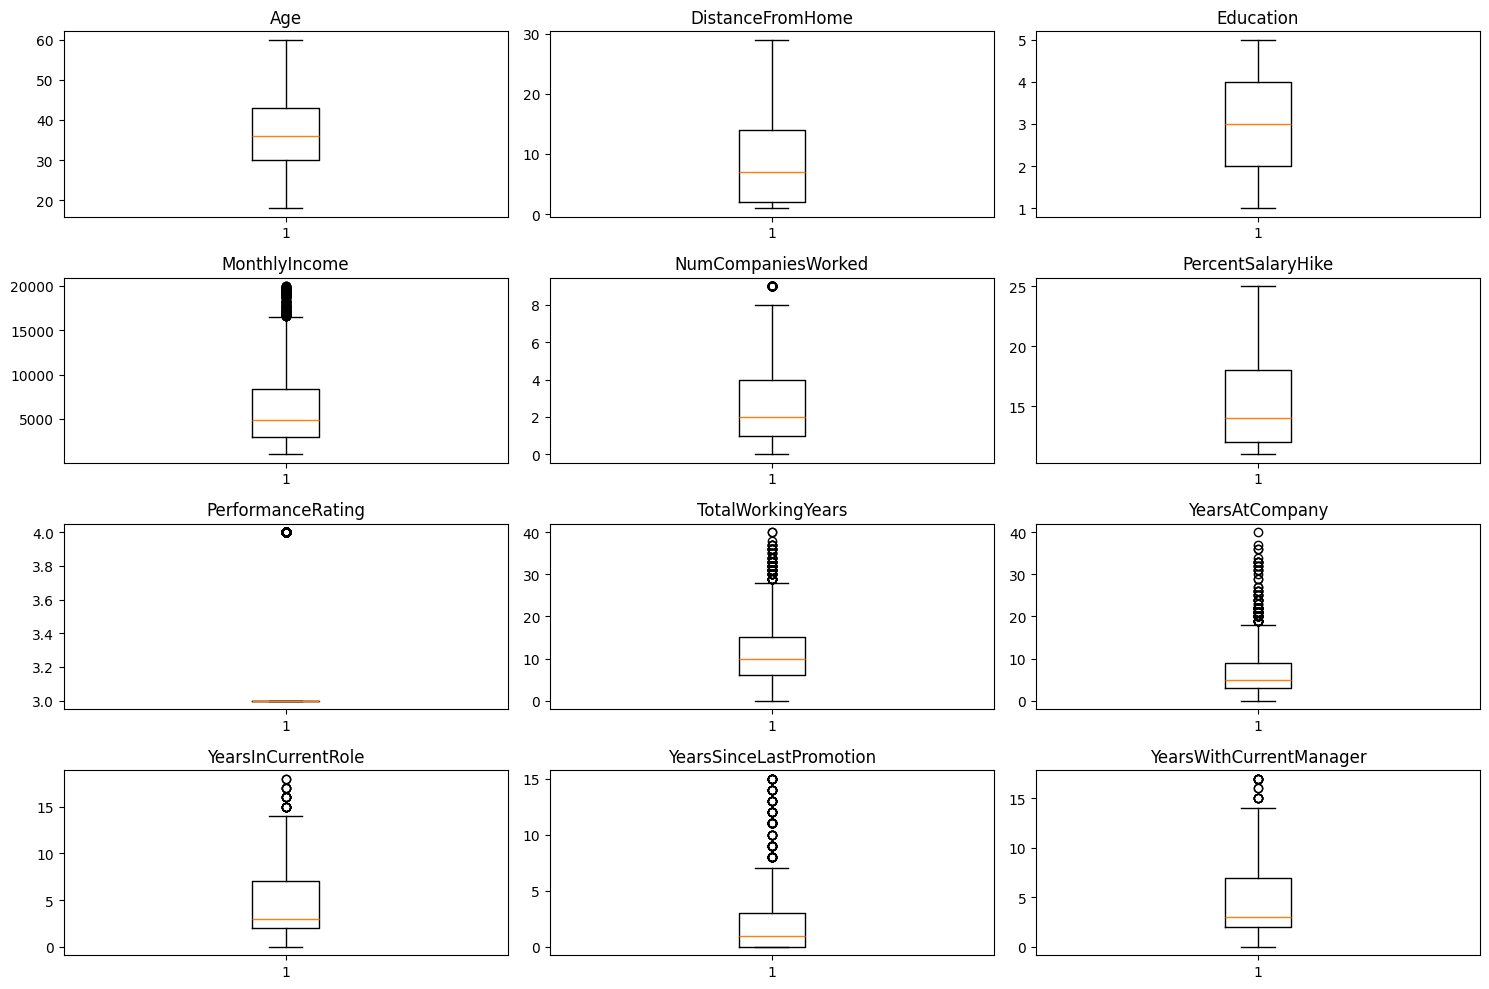

In [70]:
# Checking outlier

# plot figure 
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)
    
# hapus plot kosong
for j in range(len(num), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

Dari hasil boxplot yang memiliki outlier adalah `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsCurrentRole`,`YearsSinceLastPromotion`, dan `YearsWithCurrentManager`. adapun kolom lain yang memiliki outlier tapi bukankah fakta nyata jadi saya abaikan

Seperti penjelasan di atas adanya outlier sehingga harus di atasi, dalam hal ini saya menggunakan metode Winsorization.

Cara melakukannya adalah memfilter ditribusi normal dan tidak dengan menggunakan motode statistika skewnes dan menset threshold.
- Threshold untuk Distribusi Normal: 
Biasanya, nilai skewness yang mendekati nol (`misalnya, antara -0.5 hingga 0.5`) menunjukkan bahwa distribusi data cenderung normal. 
- Threshold untuk Distribusi Skewed:
Distribusi data dikatakan skewed jika nilai skewnessnya melebihi nilai ambang tertentu. Secara umum, `nilai skewness di atas 0.5 atau di bawah -0.5` sering digunakan sebagai indikator bahwa distribusi data tidak simetris dan cenderung skewed. 


In [71]:
# Filter Numerical Columns into Variable
# num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
num_cols = ['Age', 'DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrentManager']

# Making data and columns for normal distribution
dataNum_normal = []
listCols_normal = []

# Making data and columns for skewed distribution
dataNum_skewed = []
listCols_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for cols in num_cols:
    skewness = X_train[cols].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        listCols_normal.append(cols)
        dataNum_normal.append([cols, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        listCols_skewed.append(cols)
        dataNum_skewed.append([cols, skewness])

In [72]:
# Showing skewed columns
data_normal = pd.DataFrame(data=dataNum_normal, columns=['kolom_normal', 'skewness'])
data_normal

kolom_normal  skewness
0          Age  0.388294

In [73]:
# Showing skewed columns
data_skew = pd.DataFrame(data=dataNum_skewed, columns=['kolom_skewed', 'skewness'])
data_skew

kolom_skewed  skewness
0         DistanceFromHome  0.983001
1            MonthlyIncome  1.368743
2        PercentSalaryHike  0.873587
3        TotalWorkingYears  1.126935
4           YearsAtCompany  1.796377
5       YearsInCurrentRole  0.885155
6  YearsSinceLastPromotion  1.989845
7  YearsWithCurrentManager  0.813699

In [74]:
# # Input low variation columns into variable
# col_lowVarition = ['PerformanceRating']

# # Drop the low variation columns in skewed columns, and add it into normal distribution columns
# for kolom in col_lowVarition:
#     listCols_skewed.remove(kolom) #-> removing low variation columns in skewed columns
#     listCols_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [75]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [76]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [77]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

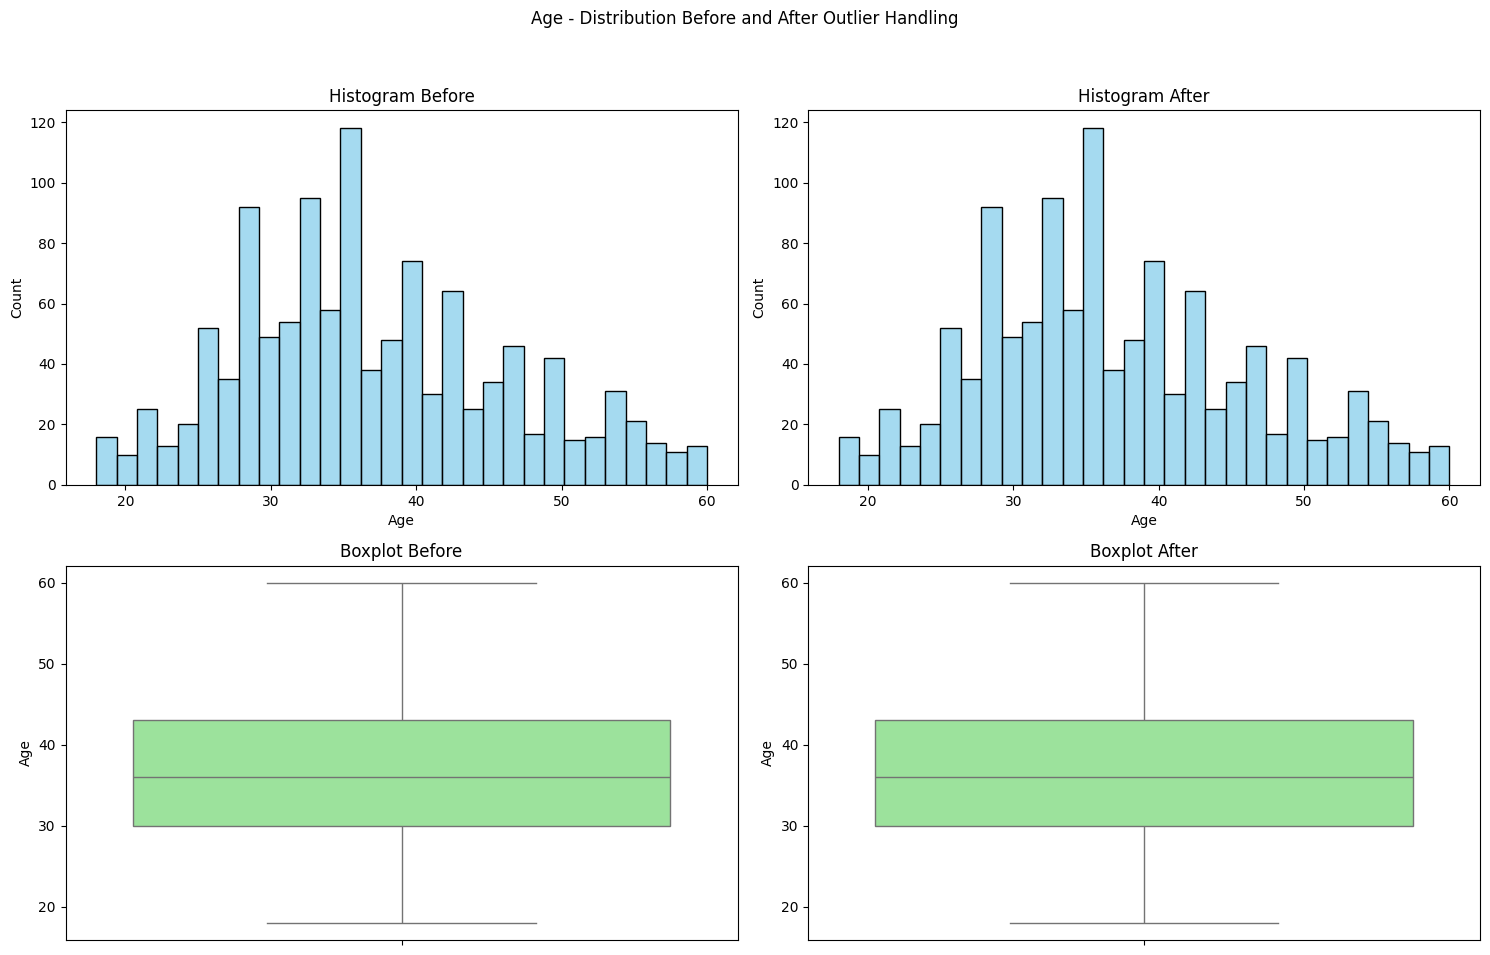

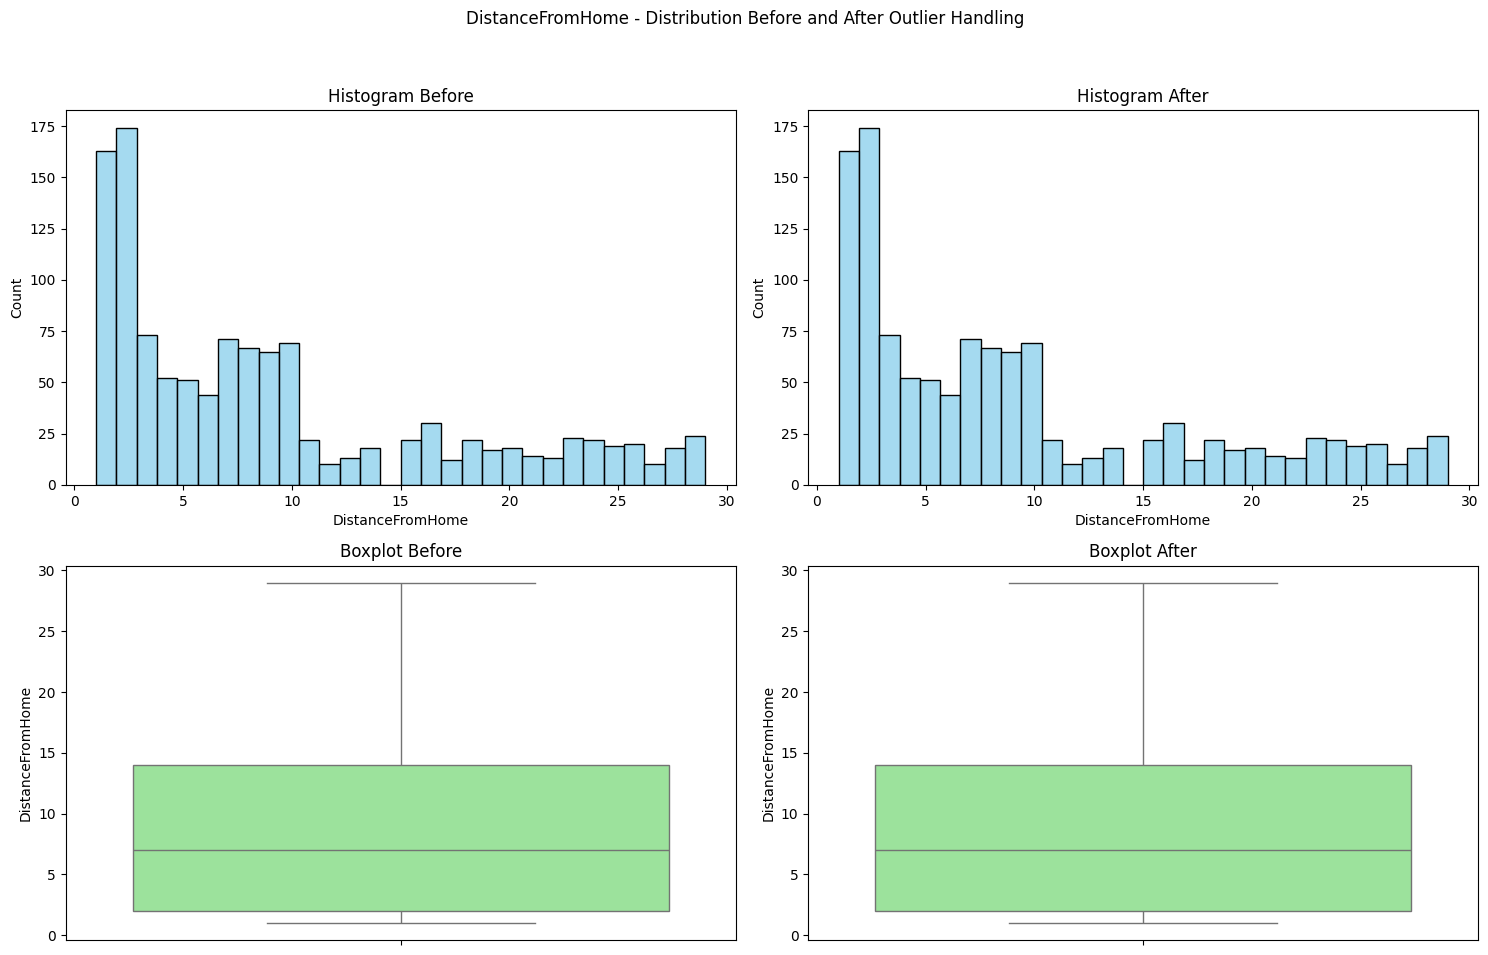

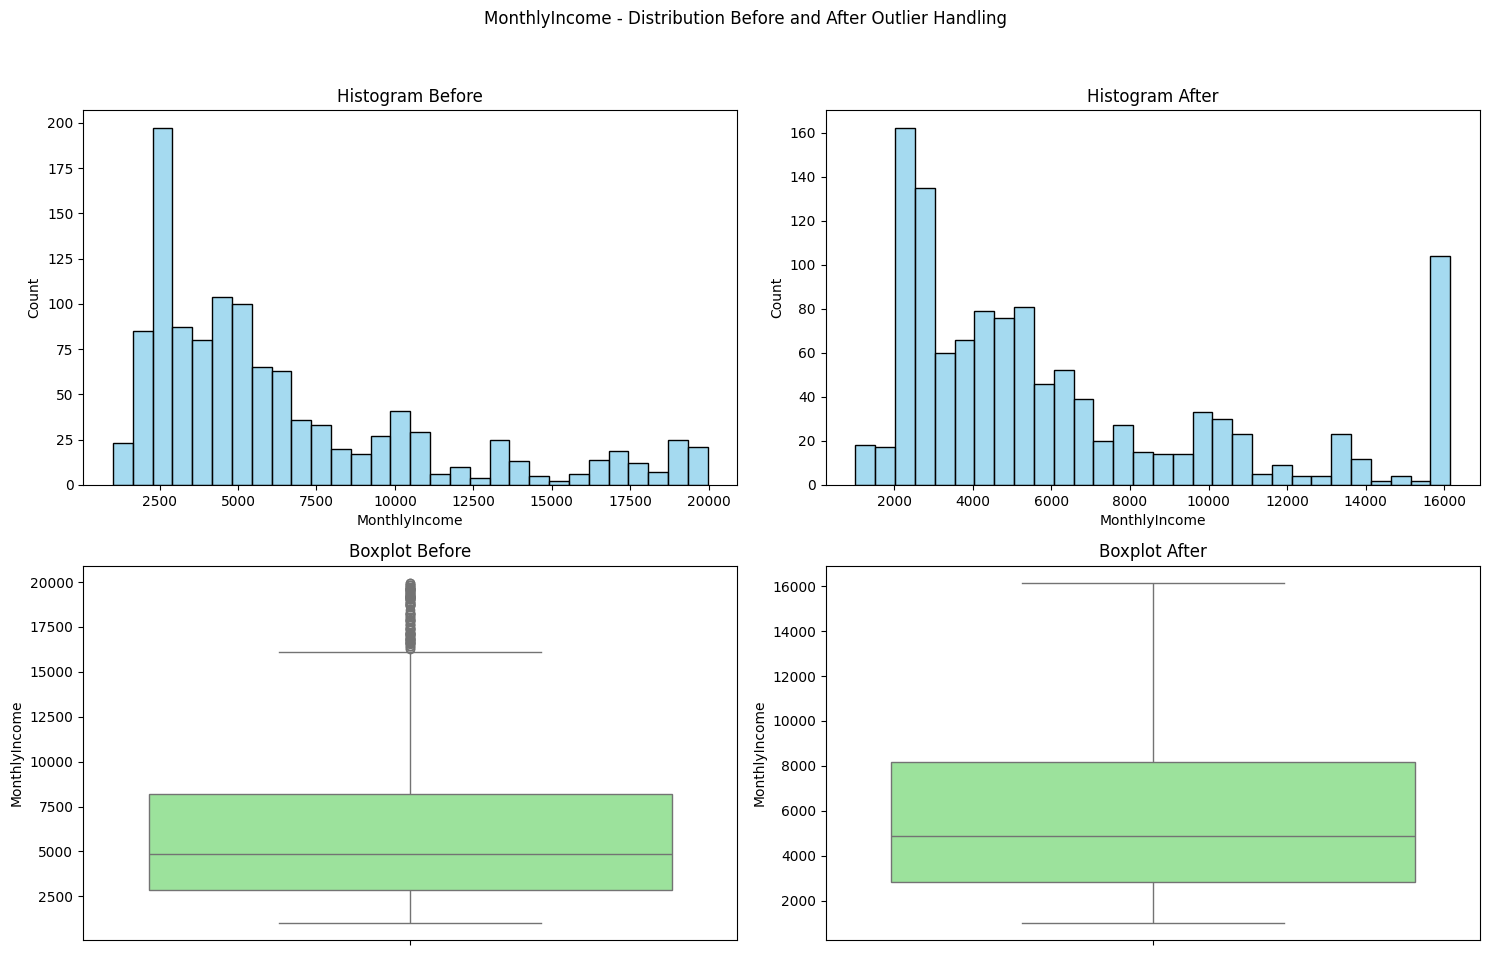

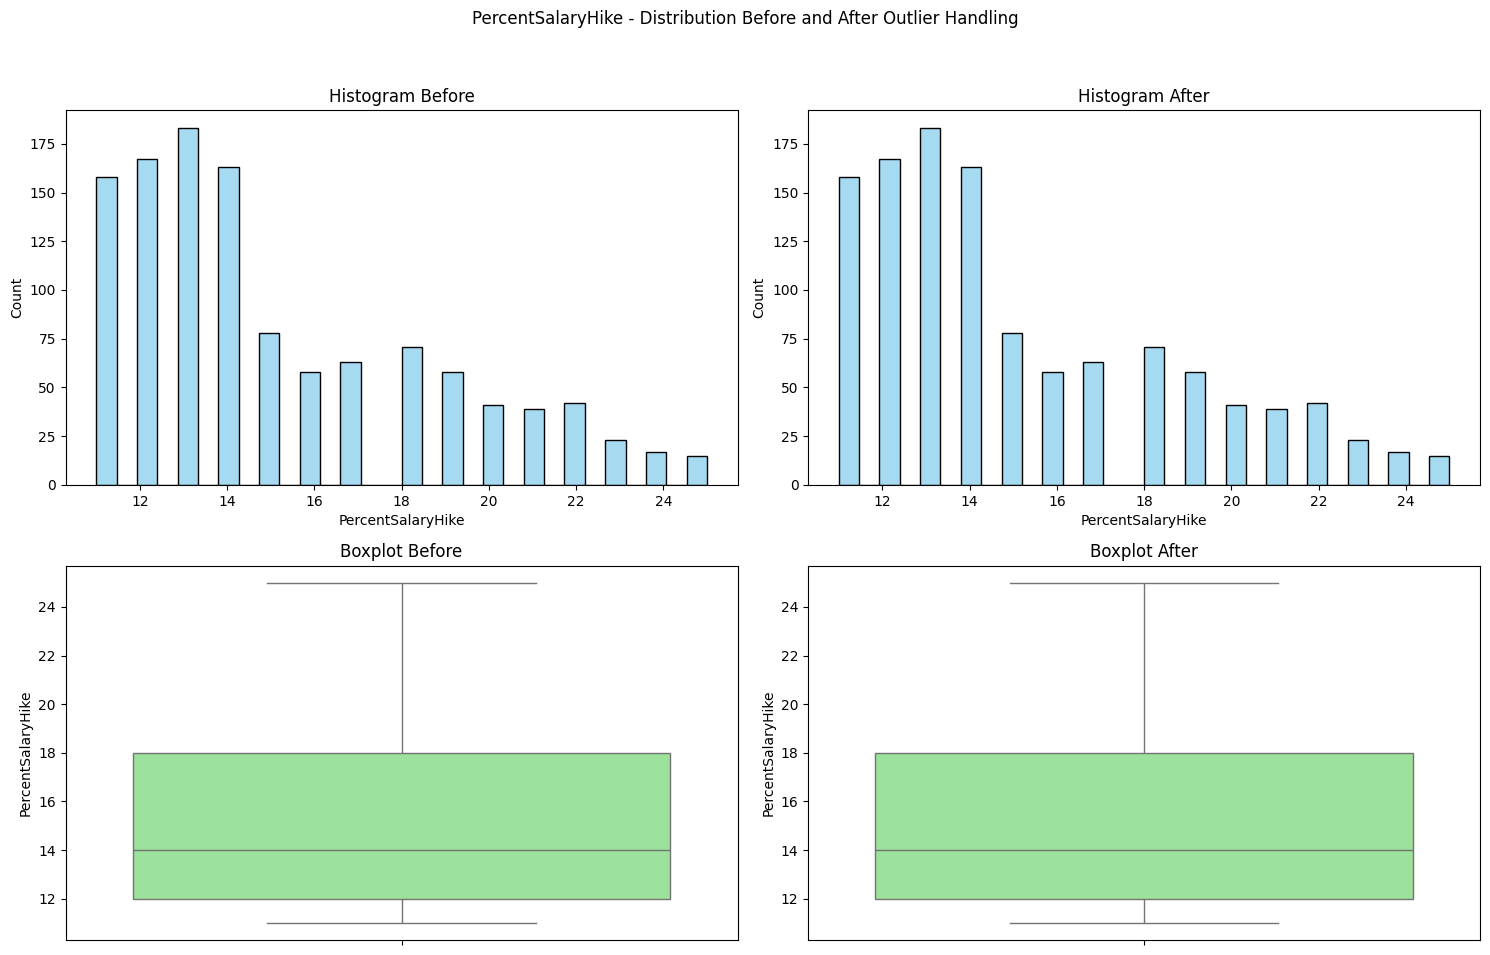

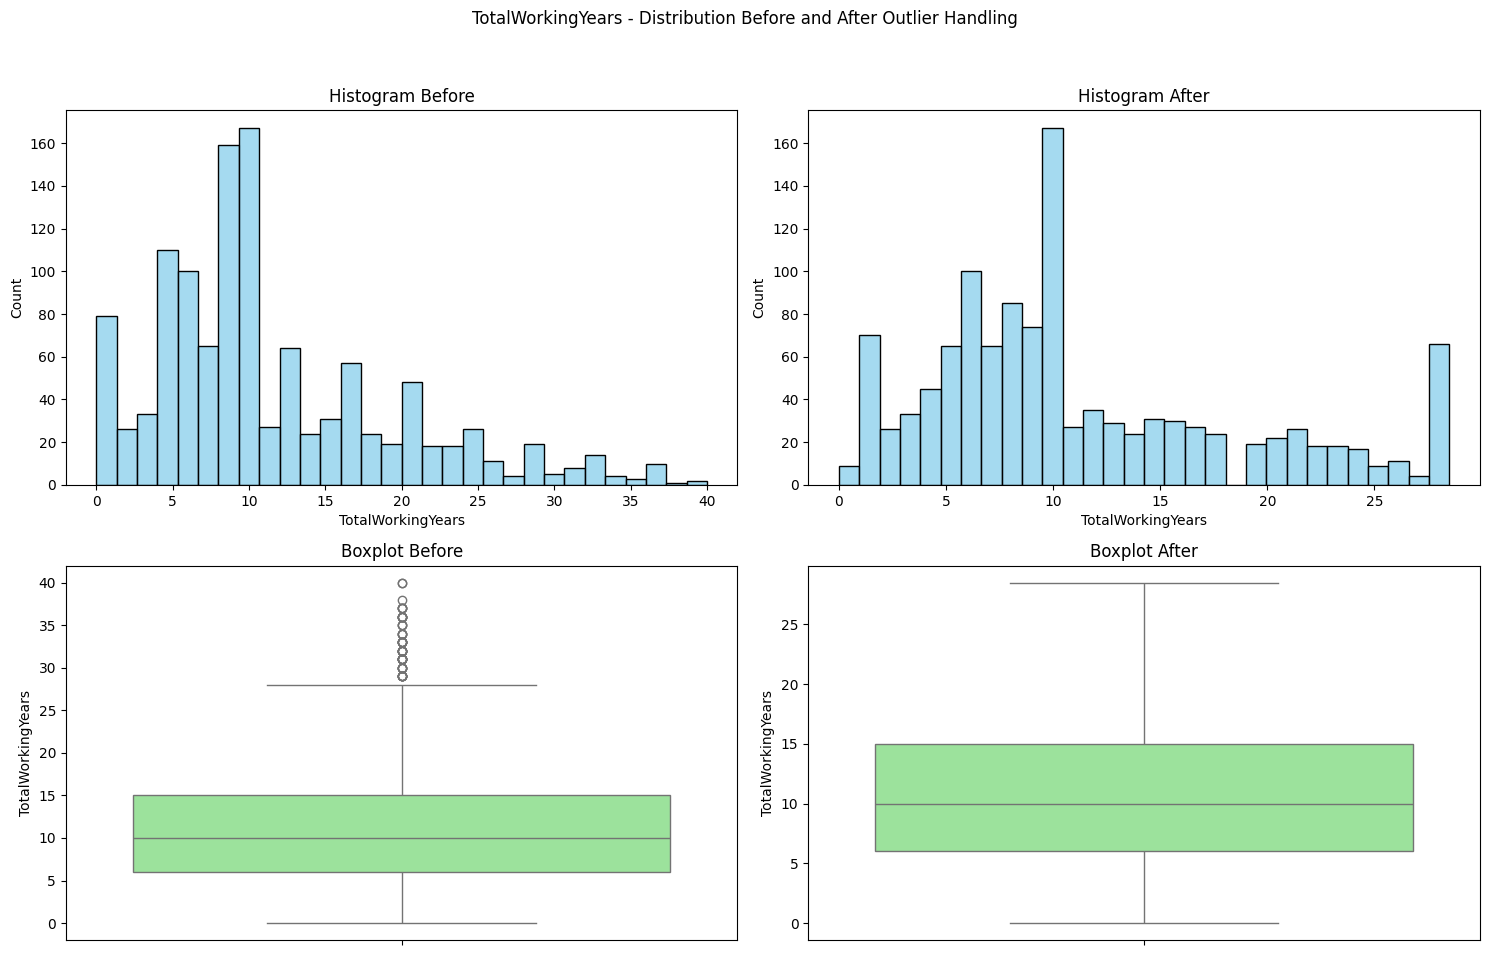

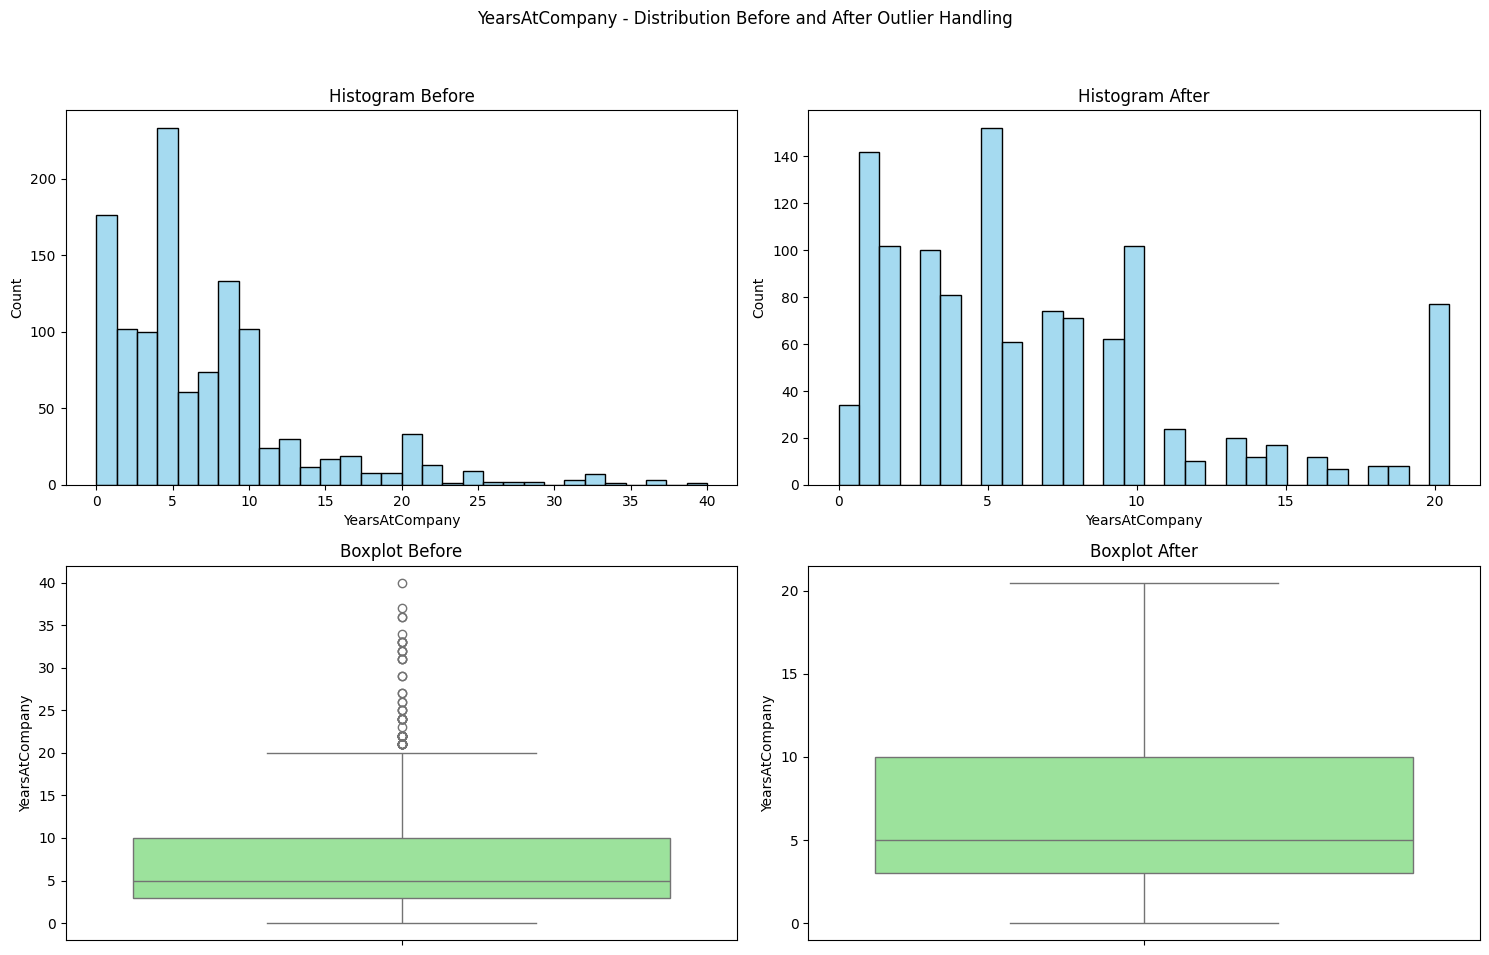

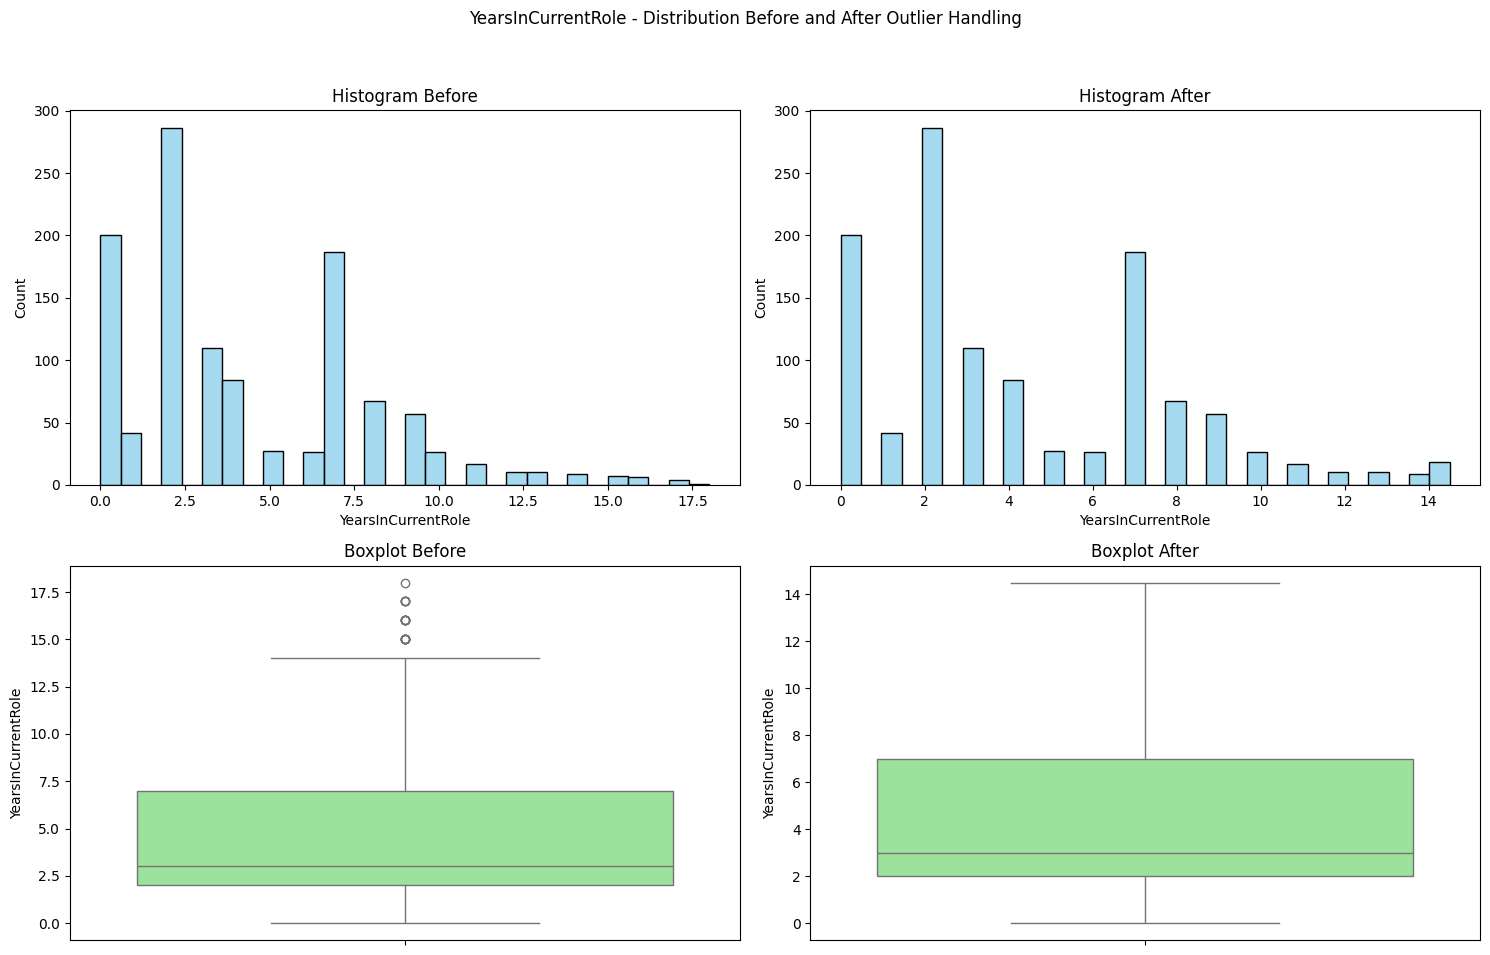

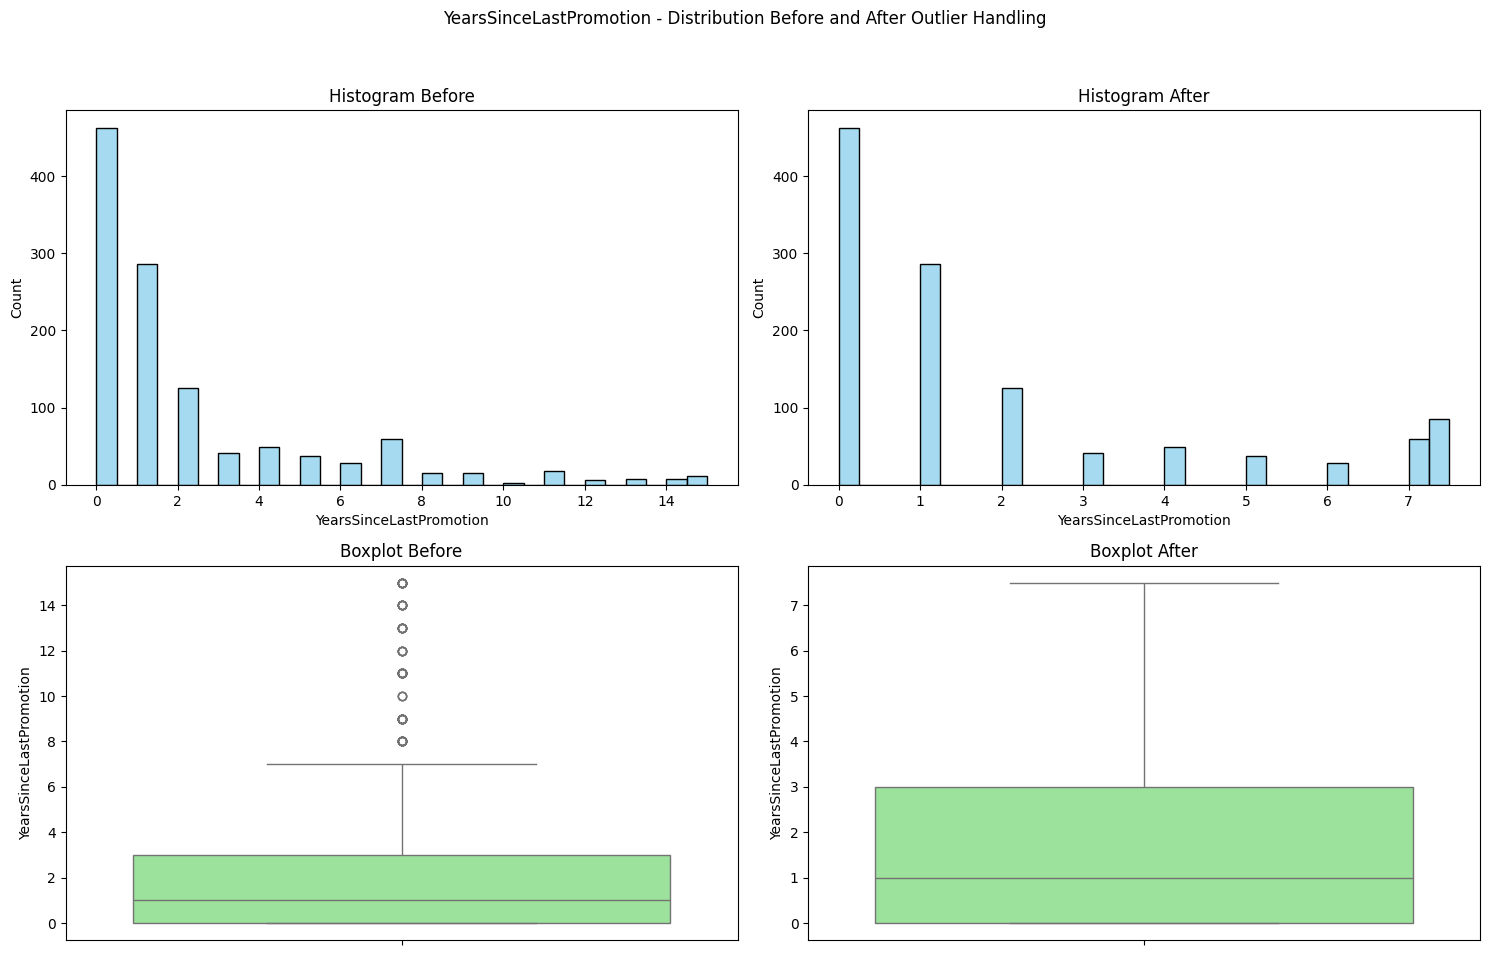

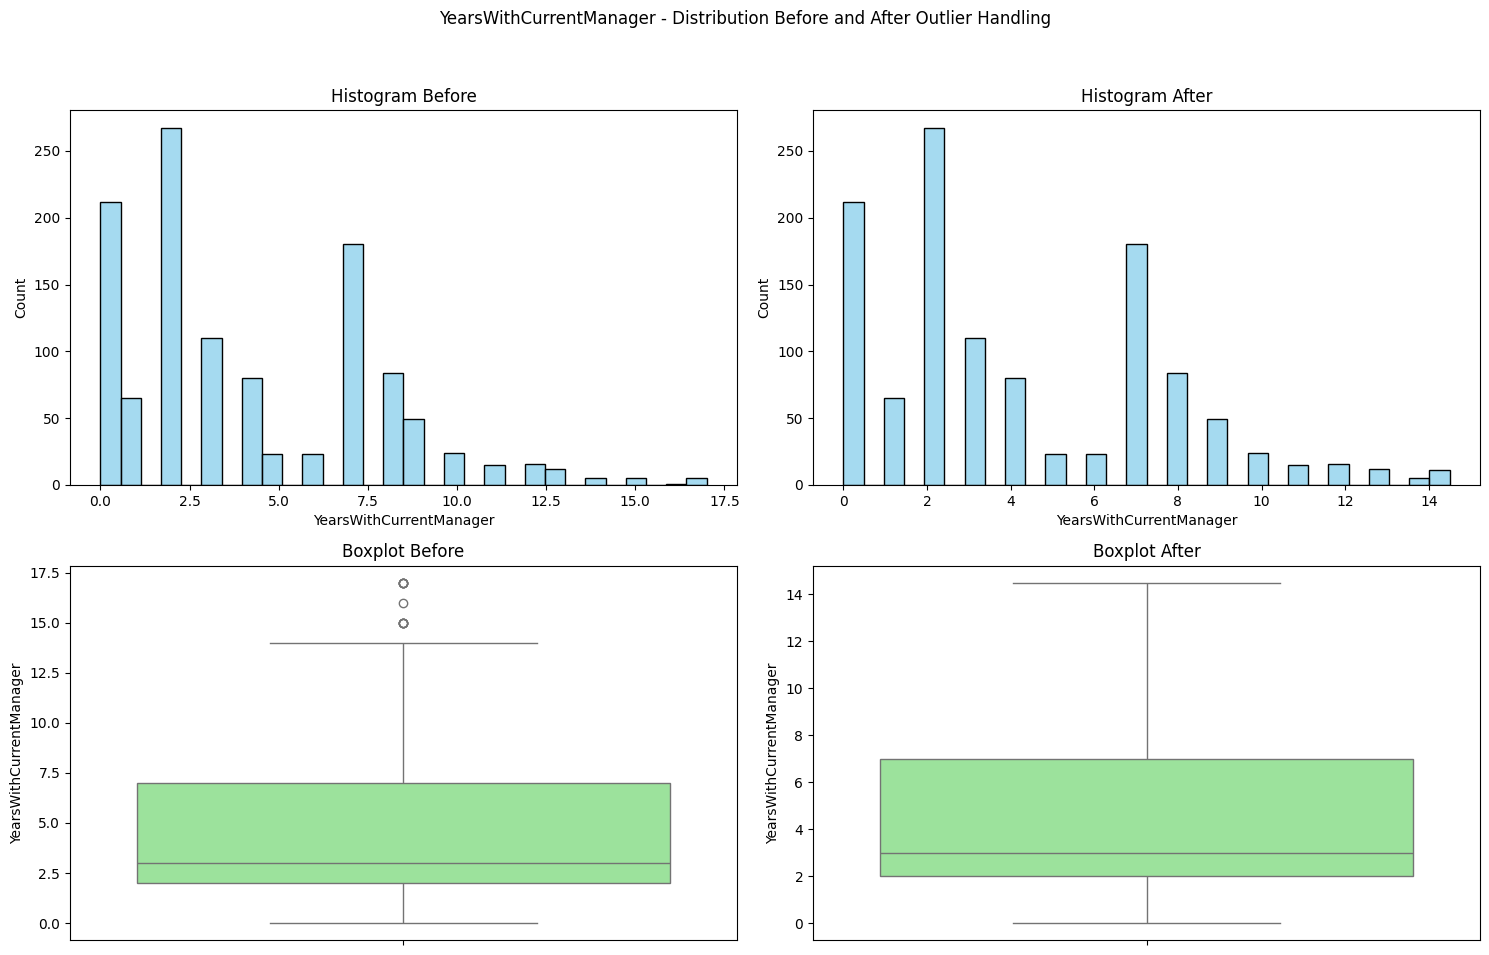

In [78]:
# Using the Function
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

## Spliting Data Numerik dan Kategorik

In [79]:
# column numeric list
# num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
num_columns = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'PerformanceRating',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrentManager'
]
# column categorical list
# cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()
cat_columns = [
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'Gender',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'WorkLifeBalance'
]


print('Numerical List: ', num_columns)
print('Catgorical List: ', cat_columns)

Numerical List:  ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager']
Catgorical List:  ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'WorkLifeBalance']


In [80]:
# override X_train with spliting list
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]
# override X_test with spliting list
X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [81]:
print('Size X_train_num:',X_train_num.shape)
print('Size X_train_cat:',X_train_cat.shape)
print('\n')
print('Size X_test_num:',X_test_num.shape)
print('Size X_test_cat:',X_test_cat.shape)

Size X_train_num: (1176, 11)
Size X_train_cat: (1176, 9)


Size X_test_num: (294, 11)
Size X_test_cat: (294, 9)


## Feature Selection

Dalam melakukan Feature Selection yaitu dengan membagi kolom Numerical dan Categorical, Kemudian mencari korelasi yang berpengaruh terhadap target(label) dengan cara metode statitika. 

Mencari Korelasi:
- Untuk Categorical biasanya menggunakan `Kendall Tau's` dan Numerical menggunakan `pearsonr`(distribusi normal) serta `spearmanr` (distribusi skewed/not gaussian)
- Set treshold P-value 0,05.
    - jika nilai p-value kurang dari `< 0.05`, yang berarti terdapat korelasi yang signifikan antara variabel yang dianalisis
    - Jika nilai p-value sama dengan atau lebih besar dari `>= 0.05 atau > 0.05`, yang berarti tidak terdapat korelasi yang signifikan antara variabel yang dianalisis.

### Categories Feature

In [82]:
# Finding the correlation between categorical columns and 'Attrition' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

cat_corr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

cat_corr

Column Name  Correlation Coefficient       P-value  \
0   BusinessTravel                -0.019643  4.871350e-01   
1       Department                 0.077275  6.981407e-03   
2        Education                -0.020250  4.489997e-01   
3   EducationField                 0.005869  8.265793e-01   
4           Gender                 0.021121  4.690791e-01   
5          JobRole                 0.078389  2.107160e-03   
6  JobSatisfaction                -0.053804  4.405824e-02   
7    MaritalStatus                 0.151585  4.207802e-08   
8  WorkLifeBalance                -0.032419  2.426425e-01   

               Interpretation  
0  No Significant Correlation  
1     Significant Correlation  
2  No Significant Correlation  
3  No Significant Correlation  
4  No Significant Correlation  
5     Significant Correlation  
6     Significant Correlation  
7     Significant Correlation  
8  No Significant Correlation

In [83]:
# filter corelation categorical
cat_corr = cat_corr[cat_corr['Interpretation'] == "Significant Correlation"]

cat_corr

Column Name  Correlation Coefficient       P-value  \
1       Department                 0.077275  6.981407e-03   
5          JobRole                 0.078389  2.107160e-03   
6  JobSatisfaction                -0.053804  4.405824e-02   
7    MaritalStatus                 0.151585  4.207802e-08   

            Interpretation  
1  Significant Correlation  
5  Significant Correlation  
6  Significant Correlation  
7  Significant Correlation

In [84]:
list_cat = cat_corr['Column Name'].values.tolist()
list_cat

['Department', 'JobRole', 'JobSatisfaction', 'MaritalStatus']

Jadi feature yang di pakai dari categorical column yaitu ('Department', 'JobRole', 'MaritalStatus')

### Numerical Feature

In [85]:
# Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

num_corr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

num_corr

Column Name  Correlation Coefficient       P-value  \
0                       Age                -0.148211  3.301153e-07   
1          DistanceFromHome                 0.053976  6.426177e-02   
2             MonthlyIncome                -0.187970  8.184376e-11   
3        NumCompaniesWorked                 0.027329  3.490867e-01   
4         PercentSalaryHike                -0.029217  3.167869e-01   
5         PerformanceRating                -0.015841  5.873450e-01   
6         TotalWorkingYears                -0.193299  2.311386e-11   
7            YearsAtCompany                -0.185843  1.342098e-10   
8        YearsInCurrentRole                -0.178420  7.205365e-10   
9   YearsSinceLastPromotion                -0.051795  7.581262e-02   
10  YearsWithCurrentManager                -0.162425  2.127150e-08   

                Interpretation  
0      Significant Correlation  
1   No Significant Correlation  
2      Significant Correlation  
3   No Significant Correlation  
4   No Significant Correlation  
5   No Significant Correlation  
6      Significant Correlation  
7      Significant Correlation  
8      Significant Correlation  
9   No Significant Correlation  
10     Significant Correlation

In [86]:
# filter corelation categorical
num_corr = num_corr[num_corr['Interpretation'] == "Significant Correlation"]
num_corr

Column Name  Correlation Coefficient       P-value  \
0                       Age                -0.148211  3.301153e-07   
2             MonthlyIncome                -0.187970  8.184376e-11   
6         TotalWorkingYears                -0.193299  2.311386e-11   
7            YearsAtCompany                -0.185843  1.342098e-10   
8        YearsInCurrentRole                -0.178420  7.205365e-10   
10  YearsWithCurrentManager                -0.162425  2.127150e-08   

             Interpretation  
0   Significant Correlation  
2   Significant Correlation  
6   Significant Correlation  
7   Significant Correlation  
8   Significant Correlation  
10  Significant Correlation

In [87]:
list_num  = num_corr['Column Name'].values.tolist()
list_num 

['Age',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrentManager']

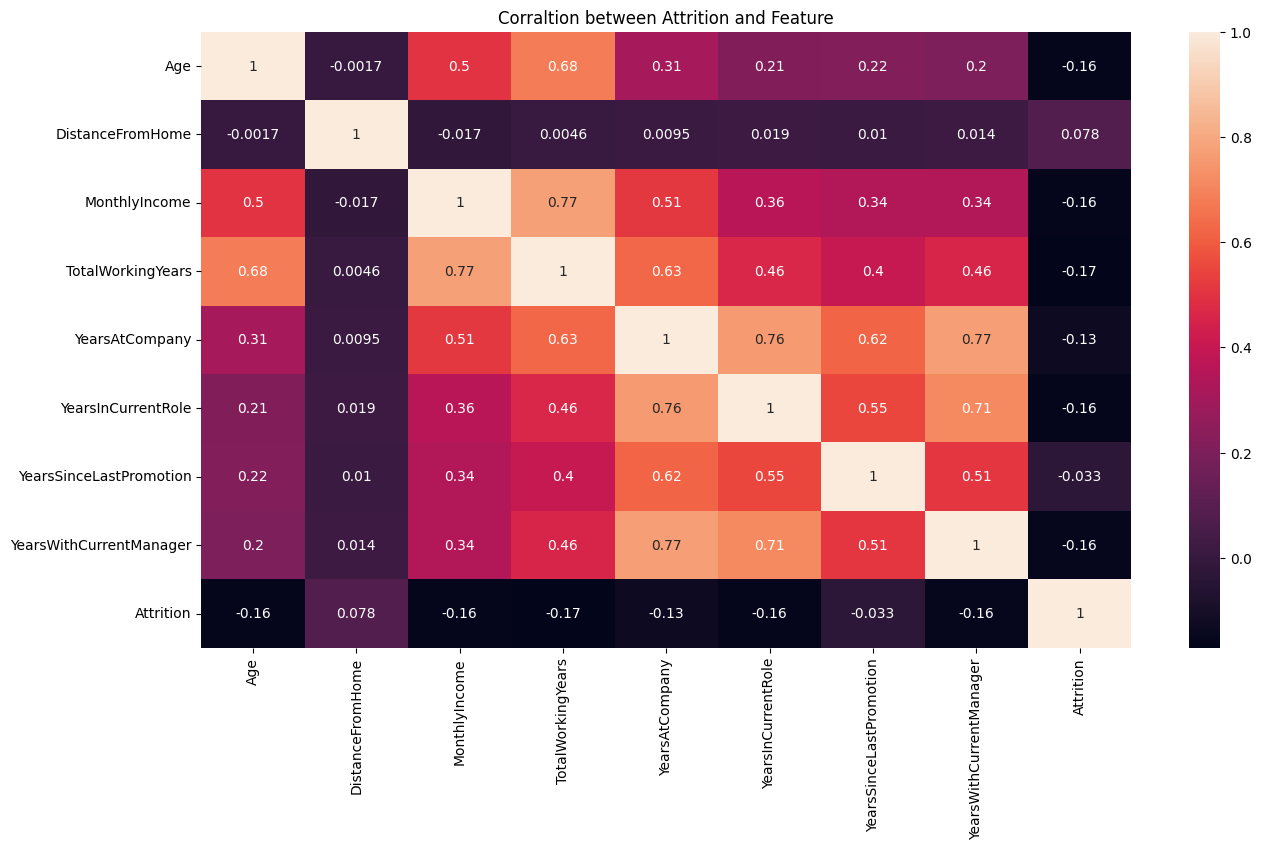

In [88]:
#Creating a heatmap for a better visualization
plt.figure(figsize=(15,8))
sns.heatmap(data[['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrentManager','Attrition']].corr(),annot=True)
plt.title('Corraltion between Attrition and Feature')
plt.show()

Dari korelasi Numerical column yaitu ('Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrentManager')

### Membuat variable baru Untuk Feature yang berkolerasi

In [89]:
# print list correlation
print('column katgorik:', list_cat)
print('column numerik:', list_num)

column katgorik: ['Department', 'JobRole', 'JobSatisfaction', 'MaritalStatus']
column numerik: ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrentManager']


In [90]:
# append ke x_train dan 
X_train_cat = X_train_cat[list_cat]
X_train_num = X_train_num[list_num]

X_test_cat = X_test_cat[list_cat]
X_test_num = X_test_num[list_num]

In [91]:
# Checking the categorical data
X_train_cat

Department                    JobRole JobSatisfaction  \
1097  Research & Development      Laboratory Technician       Very High   
727   Research & Development      Laboratory Technician             Low   
254                    Sales            Sales Executive       Very High   
1175  Research & Development      Laboratory Technician             Low   
1341                   Sales            Sales Executive          Medium   
...                      ...                        ...             ...   
1130  Research & Development  Healthcare Representative             Low   
1294  Research & Development         Research Scientist          Medium   
860                    Sales                    Manager       Very High   
1459                   Sales            Sales Executive       Very High   
1126  Research & Development         Research Scientist            High   

     MaritalStatus  
1097       Married  
727       Divorced  
254         Single  
1175      Divorced  
1341       Married  
...            ...  
1130        Single  
1294        Single  
860        Married  
1459       Married  
1126       Married  

[1176 rows x 4 columns]

In [92]:
# Checking the numerical data
X_train_num

Age  MonthlyIncome  TotalWorkingYears  YearsAtCompany  \
1097   35       2690.000                1.0             1.0   
727    24       3907.000                6.0             6.0   
254    31       6582.000               10.0             6.0   
1175   30       3072.000               12.0            12.0   
1341   32       6524.000               10.0            10.0   
...   ...            ...                ...             ...   
1130   51       7484.000               23.0            13.0   
1294   33       2313.000                5.0             2.0   
860    55      16155.625               28.5            20.5   
1459   36       6652.000                8.0             6.0   
1126   42       2936.000               10.0             6.0   

      YearsInCurrentRole  YearsWithCurrentManager  
1097                 0.0                      1.0  
727                  2.0                      2.0  
254                  5.0                      5.0  
1175                 9.0                     10.0  
1341                 8.0                      3.0  
...                  ...                      ...  
1130                12.0                      8.0  
1294                 2.0                      2.0  
860                  6.0                     13.0  
1459                 3.0                      0.0  
1126                 3.0                      3.0  

[1176 rows x 6 columns]

In [93]:
# Checking the numerical data
X_test_num

Age  MonthlyIncome  TotalWorkingYears  YearsAtCompany  \
1041   24       2210.000                1.0             1.0   
184    30       8474.000               12.0            11.0   
1222   31       4148.000                4.0             4.0   
67     43       2437.000                6.0             1.0   
220    40       3448.000               20.0             1.0   
...   ...            ...                ...             ...   
567    41      16155.625               21.0            18.0   
560    35       2559.000                6.0             6.0   
945    40       5677.000               15.0            11.0   
522    40       2741.000               15.0             7.0   
651    25       4851.000                4.0             3.0   

      YearsInCurrentRole  YearsWithCurrentManager  
1041                 0.0                      0.0  
184                  8.0                      8.0  
1222                 3.0                      3.0  
67                   0.0                      0.0  
220                  0.0                      0.0  
...                  ...                      ...  
567                 14.5                     11.0  
560                  5.0                      1.0  
945                  8.0                     10.0  
522                  2.0                      7.0  
651                  2.0                      2.0  

[294 rows x 6 columns]

In [94]:
# Checking the numerical data
X_test_cat

Department                 JobRole JobSatisfaction  \
1041  Research & Development   Laboratory Technician          Medium   
184   Research & Development  Manufacturing Director            High   
1222  Research & Development  Manufacturing Director             Low   
67    Research & Development      Research Scientist            High   
220   Research & Development   Laboratory Technician            High   
...                      ...                     ...             ...   
567   Research & Development       Research Director            High   
560   Research & Development      Research Scientist             Low   
945                    Sales         Sales Executive          Medium   
522   Research & Development   Laboratory Technician       Very High   
651                    Sales         Sales Executive          Medium   

     MaritalStatus  
1041       Married  
184         Single  
1222       Married  
67         Married  
220        Married  
...            ...  
567       Divorced  
560         Single  
945        Married  
522        Married  
651        Married  

[294 rows x 4 columns]

## Scaling and Encoding

### Scaling

In [95]:
# Scaling menggunakan Standar Scaler karena lebih cocok untuk model linear regression 

#Initialize the Standar Scaler
# scaler = StandardScaler()
scaler = MinMaxScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.4047619 , 0.11098182, 0.03508772, 0.04878049, 0.        ,
        0.06896552],
       [0.14285714, 0.19132975, 0.21052632, 0.29268293, 0.13793103,
        0.13793103],
       [0.30952381, 0.36793675, 0.35087719, 0.29268293, 0.34482759,
        0.34482759],
       ...,
       [0.88095238, 1.        , 1.        , 1.        , 0.4137931 ,
        0.89655172],
       [0.42857143, 0.37255824, 0.28070175, 0.29268293, 0.20689655,
        0.        ],
       [0.57142857, 0.12722306, 0.35087719, 0.29268293, 0.20689655,
        0.20689655]])

### Encoding

In [96]:
# Copy biar tidak mengulang jika salah
X_train_cat_copy = X_train_cat.copy()
X_test_cat_copy = X_test_cat.copy()

In [97]:
X_train_cat_copy.nunique()

Department         3
JobRole            9
JobSatisfaction    4
MaritalStatus      3
dtype: int64

In [98]:
X_train_cat_copy

Department                    JobRole JobSatisfaction  \
1097  Research & Development      Laboratory Technician       Very High   
727   Research & Development      Laboratory Technician             Low   
254                    Sales            Sales Executive       Very High   
1175  Research & Development      Laboratory Technician             Low   
1341                   Sales            Sales Executive          Medium   
...                      ...                        ...             ...   
1130  Research & Development  Healthcare Representative             Low   
1294  Research & Development         Research Scientist          Medium   
860                    Sales                    Manager       Very High   
1459                   Sales            Sales Executive       Very High   
1126  Research & Development         Research Scientist            High   

     MaritalStatus  
1097       Married  
727       Divorced  
254         Single  
1175      Divorced  
1341       Married  
...            ...  
1130        Single  
1294        Single  
860        Married  
1459       Married  
1126       Married  

[1176 rows x 4 columns]

In [99]:
X_train_cat_copy['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [100]:
#Initialize the OneHotEncoder
# ohe_Encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# le_Encoder = LabelEncoder()

cats = [
    ['Research & Development', 'Sales', 'Human Resources'],
    ['Laboratory Technician', 'Sales Executive',
       'Manufacturing Director', 'Sales Representative',
       'Research Director', 'Research Scientist', 'Manager',
       'Healthcare Representative', 'Human Resources'],
    ['Low','Medium', 'High','Very High'],
    ['Married', 'Divorced', 'Single']
]


ord_encodeRank = OrdinalEncoder(categories=cats)
# ord_Encoder = OrdinalEncoder()

X_train_cat_encoded = ord_encodeRank.fit_transform(X_train_cat_copy)
X_test_cat_encoded = ord_encodeRank.transform(X_test_cat_copy)


# Fit_transform for X_train, transform for X_test Using ordinalEncoder
# X_train_cat_encoded = ord_Encoder.fit_transform(X_train_cat_copy)
# X_test_cat_encoded = ord_Encoder.transform(X_test_cat_copy)

#Fit_transform for X_train, transform for X_test
X_train_cat_encoded


array([[0., 0., 3., 0.],
       [0., 0., 0., 1.],
       [1., 1., 3., 2.],
       ...,
       [1., 6., 3., 0.],
       [1., 1., 3., 0.],
       [0., 5., 2., 0.]])

In [101]:
X_train_cat_encoded

array([[0., 0., 3., 0.],
       [0., 0., 0., 1.],
       [1., 1., 3., 2.],
       ...,
       [1., 6., 3., 0.],
       [1., 1., 3., 0.],
       [0., 5., 2., 0.]])

### Concatenate Categorical and Numerical

In [102]:
X_train_final = np.concatenate([X_train_num_scaled,X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded],axis=1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [103]:
X_train_final

0         1         2         3         4         5    6    7  \
0     0.404762  0.110982  0.035088  0.048780  0.000000  0.068966  0.0  0.0   
1     0.142857  0.191330  0.210526  0.292683  0.137931  0.137931  0.0  0.0   
2     0.309524  0.367937  0.350877  0.292683  0.344828  0.344828  1.0  1.0   
3     0.285714  0.136202  0.421053  0.585366  0.620690  0.689655  0.0  0.0   
4     0.333333  0.364108  0.350877  0.487805  0.551724  0.206897  1.0  1.0   
...        ...       ...       ...       ...       ...       ...  ...  ...   
1171  0.785714  0.427488  0.807018  0.634146  0.827586  0.551724  0.0  7.0   
1172  0.357143  0.086092  0.175439  0.097561  0.137931  0.137931  0.0  5.0   
1173  0.880952  1.000000  1.000000  1.000000  0.413793  0.896552  1.0  6.0   
1174  0.428571  0.372558  0.280702  0.292683  0.206897  0.000000  1.0  1.0   
1175  0.571429  0.127223  0.350877  0.292683  0.206897  0.206897  0.0  5.0   

        8    9  
0     3.0  0.0  
1     0.0  1.0  
2     3.0  2.0  
3     0.0  1.0  
4     1.0  0.0  
...   ...  ...  
1171  0.0  2.0  
1172  1.0  2.0  
1173  3.0  0.0  
1174  3.0  0.0  
1175  2.0  0.0  

[1176 rows x 10 columns]

In [104]:
X_test_final

0         1         2         3         4         5    6    7  \
0    0.142857  0.079292  0.035088  0.048780  0.000000  0.000000  0.0  0.0   
1    0.285714  0.492849  0.421053  0.536585  0.551724  0.551724  0.0  2.0   
2    0.309524  0.207241  0.140351  0.195122  0.206897  0.206897  0.0  2.0   
3    0.595238  0.094278  0.210526  0.048780  0.000000  0.000000  0.0  5.0   
4    0.523810  0.161026  0.701754  0.048780  0.000000  0.000000  0.0  0.0   
..        ...       ...       ...       ...       ...       ...  ...  ...   
289  0.547619  1.000000  0.736842  0.878049  1.000000  0.758621  0.0  4.0   
290  0.404762  0.102333  0.210526  0.292683  0.344828  0.068966  0.0  5.0   
291  0.523810  0.308187  0.526316  0.536585  0.551724  0.689655  1.0  1.0   
292  0.523810  0.114349  0.526316  0.341463  0.137931  0.482759  0.0  0.0   
293  0.166667  0.253654  0.140351  0.146341  0.137931  0.137931  1.0  1.0   

       8    9  
0    1.0  0.0  
1    2.0  2.0  
2    0.0  0.0  
3    2.0  0.0  
4    2.0  0.0  
..   ...  ...  
289  2.0  1.0  
290  0.0  2.0  
291  1.0  0.0  
292  3.0  0.0  
293  1.0  0.0  

[294 rows x 10 columns]

In [105]:
# checking sizes
print('X Ukuran train-set :', X_train_final.shape)
print('y Ukuran train-set :', y_train.shape)
print('')
print('X Ukuran test-set :', X_test_final.shape)
print('y Ukuran test-set :', y_test.shape)

X Ukuran train-set : (1176, 10)
y Ukuran train-set : (1176,)

X Ukuran test-set : (294, 10)
y Ukuran test-set : (294,)


<Figure size 640x480 with 0 Axes>

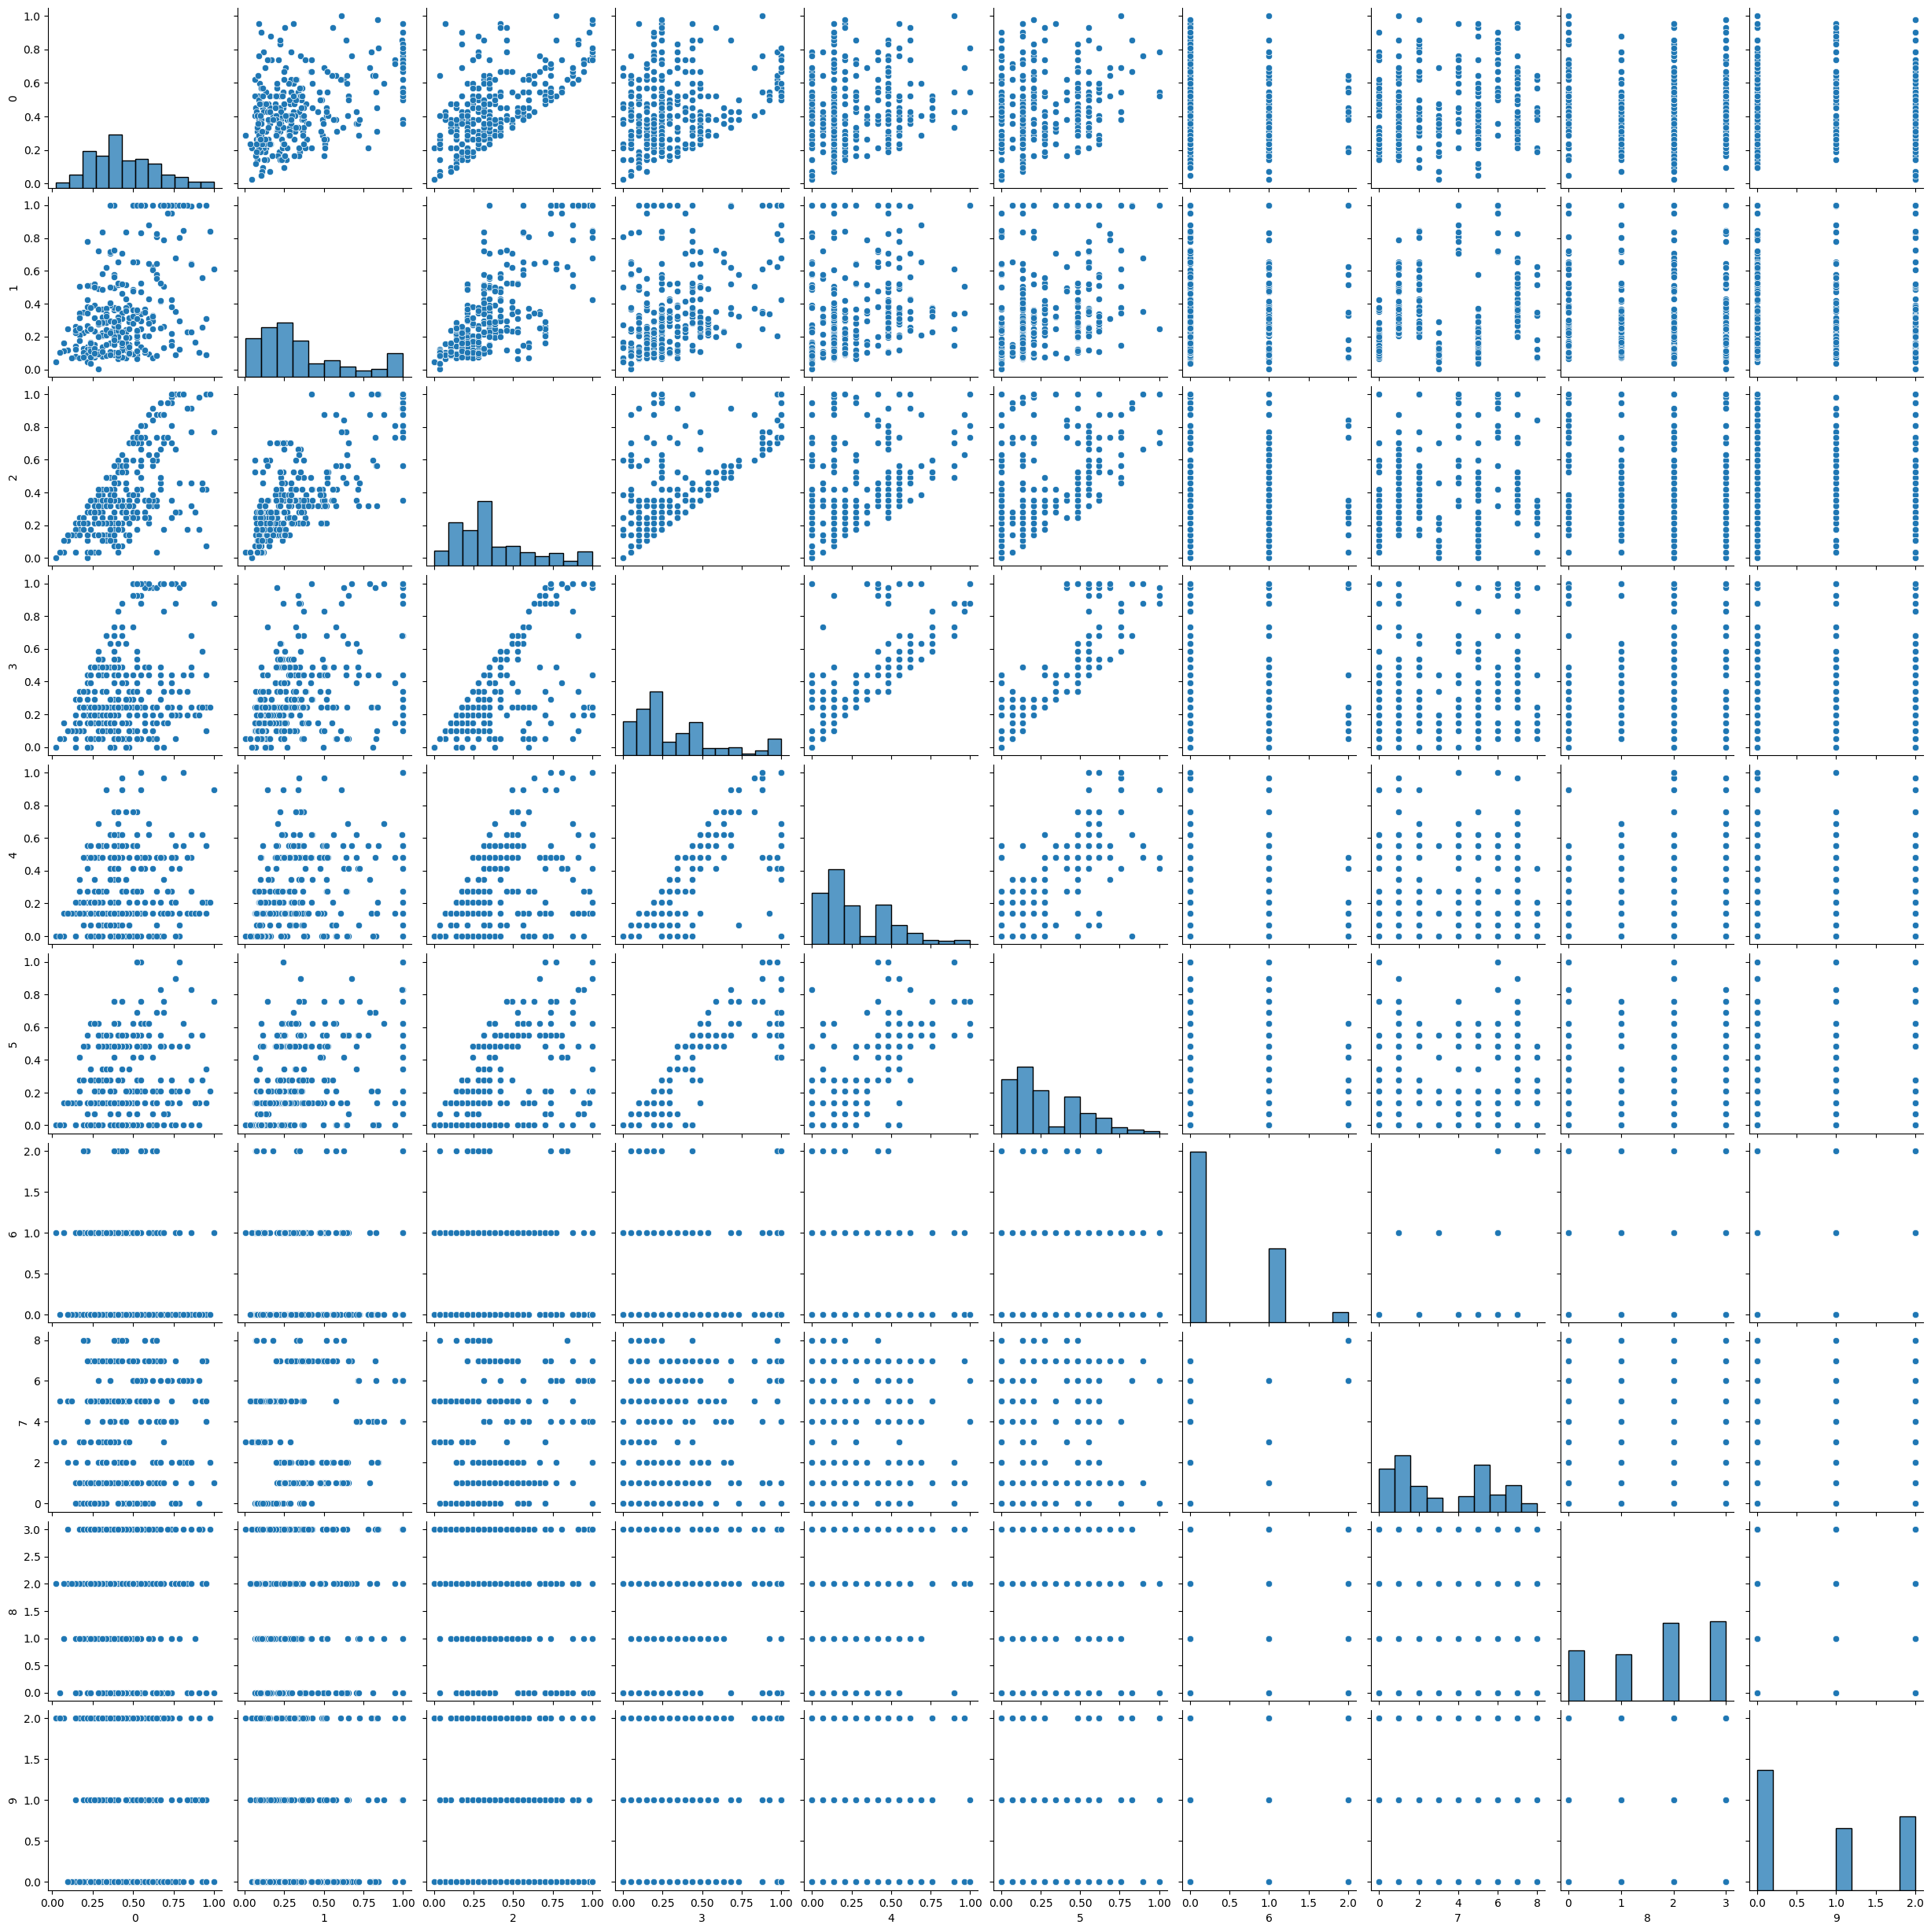

In [106]:
# checking distribution selected feature
plt.figure()
sns.pairplot(X_test_final)  
#Taking hue 
plt.show()

## Balancing dengan SMOTE

In [107]:
# Transfrom balanced into training dataset
overSampler = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=22)
X_train_final, y_train = overSampler.fit_resample(X_train_final,y_train)

In [108]:
counter = Counter(y_train)
print(counter)

Counter({0: 987, 1: 987})


Oke Data train sudah balance (seimbang)

---

# vi. Modeling 

### Base Model

In [109]:
# Base Model
base_logReg = LogisticRegression() # Logistic Regression

In [110]:
base_knn = KNeighborsClassifier() # KNN

In [111]:
base_SVC = SVC() # SVM

In [112]:
base_dectree = DecisionTreeClassifier() # Decision Tree

In [113]:
base_randFo =  RandomForestClassifier() # Random Forest (Bagging model)

In [114]:
base_xgb = XGBClassifier() # XGboost 

### Model Training

In [115]:
# Training model
base_logReg.fit(X_train_final, y_train) # Logistic Regression

LogisticRegression()

In [116]:
base_knn.fit(X_train_final, y_train) # KNN

KNeighborsClassifier()

In [117]:
base_SVC.fit(X_train_final,y_train) # SVM

SVC()

In [118]:
base_dectree.fit(X_train_final,y_train) # Decision Tree

DecisionTreeClassifier()

In [119]:
base_randFo.fit(X_train_final,y_train) # Random Forest (Bagging model)

RandomForestClassifier()

In [120]:
base_xgb.fit(X_train_final,y_train)# XGboost 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

Dalam model evalution tergantung pada konteks dari tujan tersebut. untuk Metric Evaluasi model untuk kasus Attrition Employee adalah `Recall`

Recall (Recall atau Sensitivitas): Penting untuk meminimalkan false negatives, yaitu kasus di mana model tidak mengidentifikasi karyawan yang sebenarnya akan meninggalkan perusahaan. Dengan memaksimalkan recall, Anda dapat memastikan bahwa karyawan yang berisiko tinggi benar-benar diidentifikasi, sehingga Anda dapat mengambil tindakan pencegahan yang sesuai.

**Target:**

**Yes = 1**  
**No = 0**

In [121]:
# Model Evaluation Utilities

# fungsi evaluasi
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  # print('Accuracy Score - : ', accuracy_score(y, y_pred)) # metric Accuracy score
  # print('Precision Score - : ', precision_score(y, y_pred)) # metric precision score
  print('Recall Score - : ', recall_score(y, y_pred)) # metric recall score
  # print('F1 Score - : ', f1_score(y, y_pred)) # metric f1 score
  print('Jumlah class - : ' , Counter(y_pred),'\n')
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred))


# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  """ fungsi metric scoring """
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports



Logistic Regression model - Train
Recall Score - :  0.6930091185410334
Jumlah class - :  Counter({1: 1052, 0: 922}) 



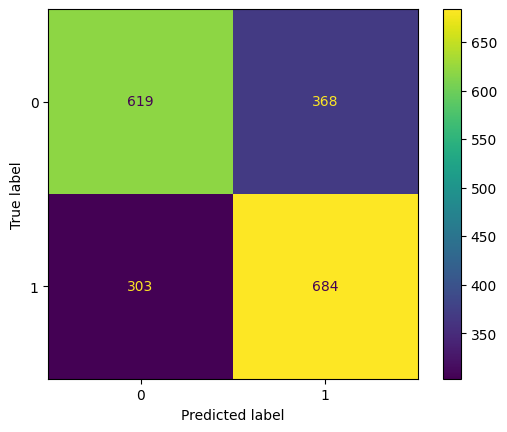

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       987
           1       0.65      0.69      0.67       987

    accuracy                           0.66      1974
   macro avg       0.66      0.66      0.66      1974
weighted avg       0.66      0.66      0.66      1974


Logistic Regression model - Test
Recall Score - :  0.6875
Jumlah class - :  Counter({0: 171, 1: 123}) 



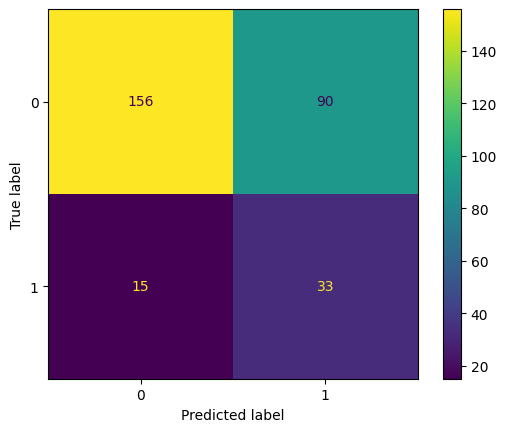

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       246
           1       0.27      0.69      0.39        48

    accuracy                           0.64       294
   macro avg       0.59      0.66      0.57       294
weighted avg       0.81      0.64      0.69       294



In [122]:
# Evaluasi model logistic Regression
print('Logistic Regression model - Train')

performance_check(base_logReg, X_train_final, y_train)
print('')

print('Logistic Regression model - Test')
performance_check(base_logReg, X_test_final, y_test)

KNN model - Train
Recall Score - :  0.9574468085106383
Jumlah class - :  Counter({1: 1131, 0: 843}) 



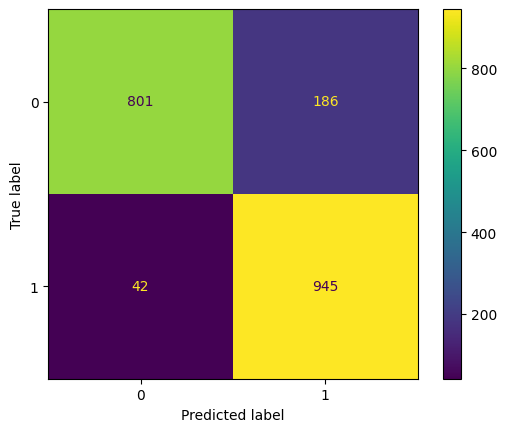

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       987
           1       0.84      0.96      0.89       987

    accuracy                           0.88      1974
   macro avg       0.89      0.88      0.88      1974
weighted avg       0.89      0.88      0.88      1974


KNN model - Test
Recall Score - :  0.4166666666666667
Jumlah class - :  Counter({0: 217, 1: 77}) 



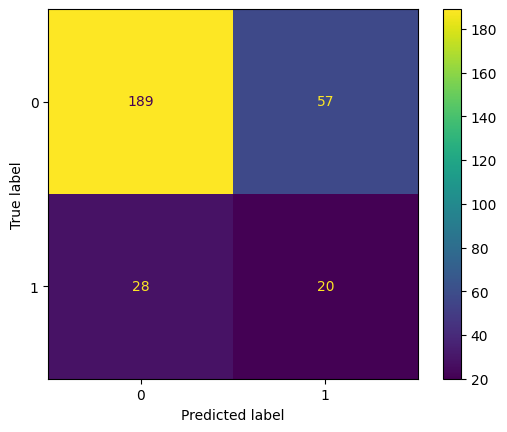

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       246
           1       0.26      0.42      0.32        48

    accuracy                           0.71       294
   macro avg       0.57      0.59      0.57       294
weighted avg       0.77      0.71      0.74       294



In [123]:
# Evaluasi model KNN
print('KNN model - Train')

performance_check(base_knn, X_train_final, y_train)
print('')

print('KNN model - Test')
performance_check(base_knn, X_test_final, y_test)

SVM classifier model - Train
Recall Score - :  0.7051671732522796
Jumlah class - :  Counter({1: 1001, 0: 973}) 



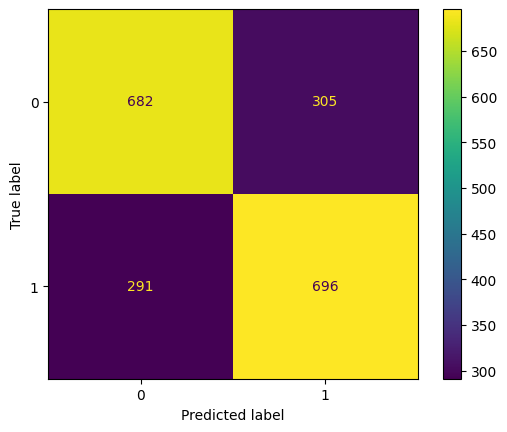

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       987
           1       0.70      0.71      0.70       987

    accuracy                           0.70      1974
   macro avg       0.70      0.70      0.70      1974
weighted avg       0.70      0.70      0.70      1974


SVM classifier model - Test
Recall Score - :  0.5833333333333334
Jumlah class - :  Counter({0: 196, 1: 98}) 



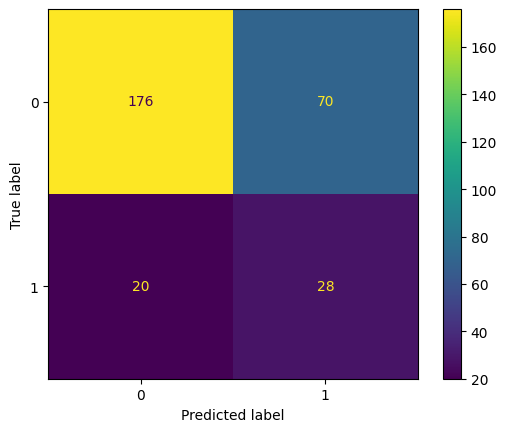

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       246
           1       0.29      0.58      0.38        48

    accuracy                           0.69       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.80      0.69      0.73       294



In [124]:
# Evaluasi model SVM classifier
print('SVM classifier model - Train')
performance_check(base_SVC, X_train_final, y_train)
print('')

print('SVM classifier model - Test')
performance_check(base_SVC, X_test_final, y_test)

Decision Tree - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



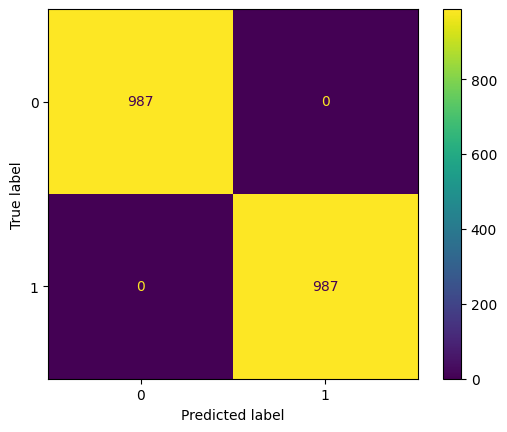

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


Decision Tree - Test
Recall Score - :  0.3333333333333333
Jumlah class - :  Counter({0: 239, 1: 55}) 



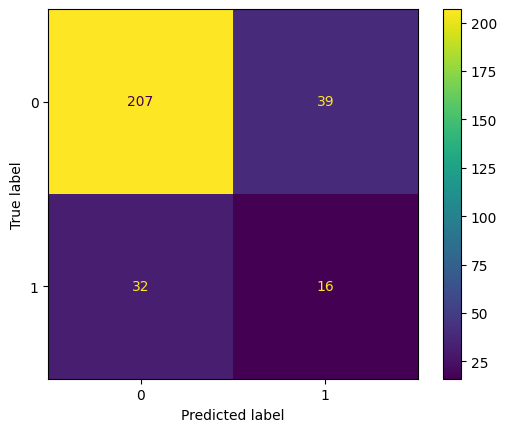

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       246
           1       0.29      0.33      0.31        48

    accuracy                           0.76       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.77      0.76      0.76       294



In [125]:
# Evaluasi model Decision Tree
print('Decision Tree - Train')
performance_check(base_dectree, X_train_final, y_train)
print('')

print('Decision Tree - Test')
performance_check(base_dectree, X_test_final, y_test)

Random forest classifier model - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



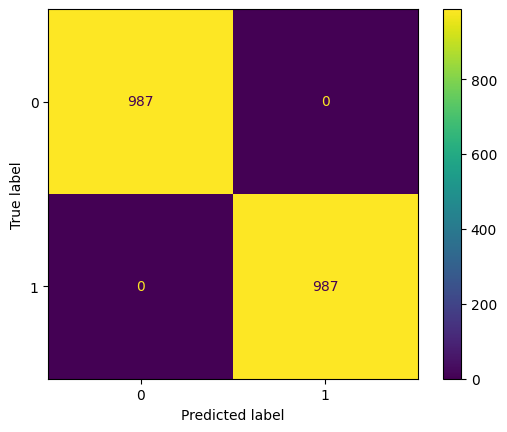

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


Random forest classifier model - Test
Recall Score - :  0.25
Jumlah class - :  Counter({0: 269, 1: 25}) 



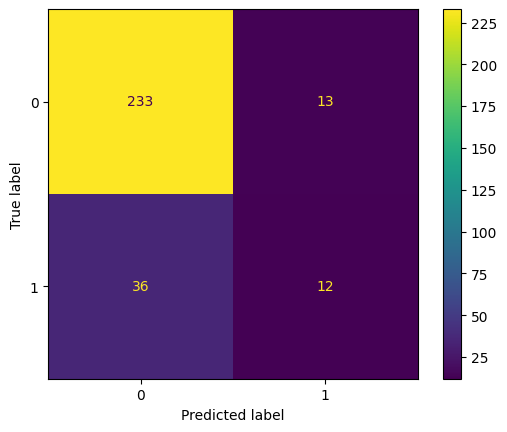

              precision    recall  f1-score   support

           0       0.87      0.95      0.90       246
           1       0.48      0.25      0.33        48

    accuracy                           0.83       294
   macro avg       0.67      0.60      0.62       294
weighted avg       0.80      0.83      0.81       294



In [126]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(base_randFo, X_train_final, y_train,)
print('')

print('Random forest classifier model - Test')
performance_check(base_randFo, X_test_final, y_test)

Xgboost classifier - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



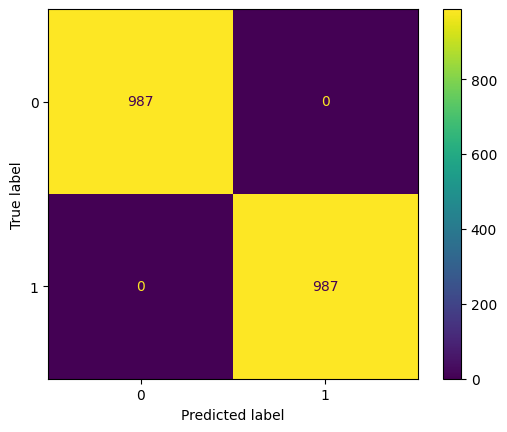

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


Xgboost classifier - Test
Recall Score - :  0.25
Jumlah class - :  Counter({0: 266, 1: 28}) 



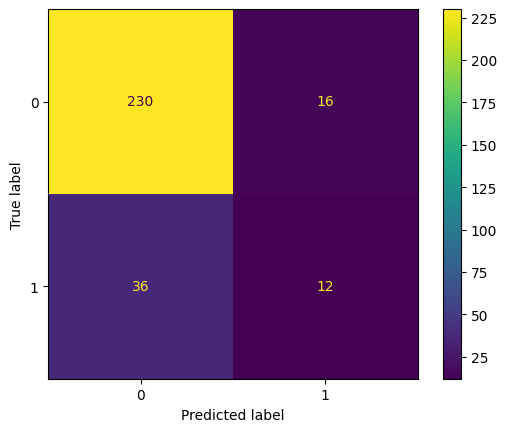

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       246
           1       0.43      0.25      0.32        48

    accuracy                           0.82       294
   macro avg       0.65      0.59      0.61       294
weighted avg       0.79      0.82      0.80       294



In [127]:
# Evaluasi model Xgboost
print('Xgboost classifier - Train')

performance_check(base_xgb, X_train_final, y_train)
print('')

print('Xgboost classifier - Test')
performance_check(base_xgb, X_test_final, y_test)

## Cross Validation

In [128]:
# # Cross Validation using `cross_val_score`  dan Kfold

# # Model SVM Classifier
# logReg_cross_val = cross_val_score(base_logReg, X_train_final, y_train, cv=5, scoring='precision')

# # Model KNN
# knn_cross_val = cross_val_score(base_knn,X_train_final,y_train,cv=5,scoring='precision')

# # Model SVM Classifier
# svc_cross_val = cross_val_score(base_SVC, X_train_final, y_train, cv=5, scoring='precision')

# # Model Decision Tree
# dectree_cross_val = cross_val_score(base_dectree, X_train_final, y_train, cv=5, scoring='precision')

# # Model Random Forest
# randFo_cross_val = cross_val_score(base_randFo, X_train_final, y_train, cv=5, scoring='precision')

# # Model Xgboost
# xgb_cross_val = cross_val_score(base_xgb, X_train_final, y_train, cv=5, scoring='precision')

# # tampilkan hasil
# print('Precision score - All - Cross Validation  : ', knn_cross_val)
# print('Precision score - Mean - Cross Validation : ', knn_cross_val.mean())
# print('Precision score - Std - Cross Validation  : ', knn_cross_val.std())
# print('Precision score - Range of Test-Set       : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))


In [129]:
def perform_cross_validation(models, X_train_final, y_train, scoring='recall'):
    results = {}
    num_folds = 5
    for model_name, model in models.items():
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=22)
        # Lakukan cross-validation untuk setiap model
        cross_val_scores = cross_val_score(model, X_train_final, y_train, cv=kf, scoring=scoring)
        
        # Simpan hasil cross-validation
        results[model_name] = cross_val_scores
        
        # Tampilkan hasil
        print(f'{model_name} - Recall score - All - Cross validation: {cross_val_scores}')
        print(f'{model_name} - Recall score - Mean - Cross Validation: {cross_val_scores.mean()}')
        print(f'{model_name} - Recall score - Std - Cross Validation: {cross_val_scores.std()}')
        
        print()
    
    return results

# Definisikan model evaluasi
models = {
    'Logistic Regression': base_logReg,
    'K-Nearest Neighbors': base_knn,
    'Support Vector Classifier': base_SVC,
    'Decision Tree': base_dectree,
    'Random Forest': base_randFo,
    'XGBoost': base_xgb
}

# Panggil fungsi perform_cross_validation
results = perform_cross_validation(models, X_train_final, y_train)


Logistic Regression - Recall score - All - Cross validation: [0.73056995 0.66504854 0.63054187 0.7393617  0.65482234]
Logistic Regression - Recall score - Mean - Cross Validation: 0.6840688801900143
Logistic Regression - Recall score - Std - Cross Validation: 0.04313216827733748

K-Nearest Neighbors - Recall score - All - Cross validation: [0.87564767 0.86893204 0.85221675 0.92021277 0.9035533 ]
K-Nearest Neighbors - Recall score - Mean - Cross Validation: 0.8841125042894079
K-Nearest Neighbors - Recall score - Std - Cross Validation: 0.024497398266061177

Support Vector Classifier - Recall score - All - Cross validation: [0.74093264 0.67961165 0.591133   0.7606383  0.52791878]
Support Vector Classifier - Recall score - Mean - Cross Validation: 0.6600468754993642
Support Vector Classifier - Recall score - Std - Cross Validation: 0.08860121522649639

Decision Tree - Recall score - All - Cross validation: [0.86010363 0.81067961 0.79310345 0.85638298 0.82741117]
Decision Tree - Recall sco

In [130]:
# def print_cross_validation(model, X, y, scoring='precision'):
#     cross_val_scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    
#     print(f'{scoring.capitalize()} score - All - Cross Validation: ', cross_val_scores)
#     print(f'{scoring.capitalize()} score - Mean - Cross Validation: ', cross_val_scores.mean())
#     print(f'{scoring.capitalize()} score - Std - Cross Validation: ', cross_val_scores.std())

In [131]:
# print_cross_validation(base_knn, X_train_final, y_train)

In [132]:
# print_cross_validation(base_SVC, X_train_final, y_train)

In [133]:
# import pandas as pd
# from sklearn.model_selection import cross_val_score, KFold

# def perform_cross_validation(model, X, y, scoring='precision'):
#     kf = KFold(n_splits=5, shuffle=True, random_state=42)
#     cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=scoring)
    
#     return {
#         'Model': str(model),
#         'Mean_' + scoring.capitalize() + '_score': cross_val_scores.mean(),
#         'Std_' + scoring.capitalize() + '_score': cross_val_scores.std()
#     }

# # List of models
# models = [base_knn, base_SVC]

# # List to store mean scores
# mean_scores_list = []

# for model in models:
#     mean_scores_list.append(perform_cross_validation(model, X_train_final, y_train))

# # DataFrame to store mean scores
# mean_scores_df = pd.DataFrame(mean_scores_list)

# mean_scores_df

In [134]:
# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  """ fungsi metric scoring """
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

In [135]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, base_logReg.predict(X_train_final), y_test, base_logReg.predict(X_test_final), 'LogReg')

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, base_knn.predict(X_train_final), y_test, base_knn.predict(X_test_final), 'KNN')

# Melakukan laporan kinerja untuk model SVC
all_reports = performance_report(all_reports, y_train, base_SVC.predict(X_train_final), y_test, base_SVC.predict(X_test_final), 'SVC')

# Melakukan laporan kinerja untuk model Decision Tree
all_reports = performance_report(all_reports, y_train,base_dectree.predict(X_train_final), y_test, base_dectree.predict(X_test_final), 'Decision Tree')

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, base_randFo.predict(X_train_final), y_test, base_randFo.predict(X_test_final), 'Random Forest')

# Melakukan laporan kinerja untuk model XGBoost
all_reports = performance_report(all_reports, y_train, base_xgb.predict(X_train_final), y_test, base_xgb.predict(X_test_final), 'XGBoost')

# Membuat DataFrame dari dictionary all_reports
df_report_base_model = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)

df_report_base_model


{'LogReg': {'train - precision': 0.6501901140684411, 'train - recall': 0.6930091185410334, 'train - accuracy': 0.660081053698075, 'train - f1_score': 0.6709171162334477, 'test - precision': 0.2682926829268293, 'test - recall': 0.6875, 'test - accuracy_score': 0.6428571428571429, 'test - f1_score': 0.38596491228070173}, 'KNN': {'train - precision': 0.8355437665782494, 'train - recall': 0.9574468085106383, 'train - accuracy': 0.8844984802431611, 'train - f1_score': 0.8923512747875354, 'test - precision': 0.2597402597402597, 'test - recall': 0.4166666666666667, 'test - accuracy_score': 0.7108843537414966, 'test - f1_score': 0.32}, 'SVC': {'train - precision': 0.6953046953046953, 'train - recall': 0.7051671732522796, 'train - accuracy': 0.6980749746707193, 'train - f1_score': 0.7002012072434608, 'test - precision': 0.2857142857142857, 'test - recall': 0.5833333333333334, 'test - accuracy_score': 0.6938775510204082, 'test - f1_score': 0.3835616438356164}, 'Decision Tree': {'train - precisio

LogReg       KNN       SVC  Decision Tree  \
train - precision      0.650190  0.835544  0.695305       1.000000   
train - recall         0.693009  0.957447  0.705167       1.000000   
train - accuracy       0.660081  0.884498  0.698075       1.000000   
train - f1_score       0.670917  0.892351  0.700201       1.000000   
test - precision       0.268293  0.259740  0.285714       0.290909   
test - recall          0.687500  0.416667  0.583333       0.333333   
test - accuracy_score  0.642857  0.710884  0.693878       0.758503   
test - f1_score        0.385965  0.320000  0.383562       0.310680   

                       Random Forest   XGBoost  
train - precision           1.000000  1.000000  
train - recall              1.000000  1.000000  
train - accuracy            1.000000  1.000000  
train - f1_score            1.000000  1.000000  
test - precision            0.480000  0.428571  
test - recall               0.250000  0.250000  
test - accuracy_score       0.833333  0.823129  
test - f1_score             0.328767  0.315789

Conclusion:  

Model secara harfiah tidak bagus bisa dilihat dari train, model belajar dengan baik namun dengan test model tidak bagus (menurun) bisa dilihat dari classification report

Dari hasil base model yang `'baik'` adalah `KNN`, `Decision tree`, `Random forest`, dan `Xgboost` bisa di lihat dari cross val yang stabil.

## Hyperparameter Tuning

In [136]:
logreg_param = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2'],
}

knn_params = {
    'n_neighbors': [3, 5, 11, 21],
    'weights': ['uniform', 'distance'],
}

svc_param = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
}

dectree_param = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

randFo_param = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

xgb_param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 7, 9],
}


- Grid Search

In [137]:
# Train model with gridsearch

# Model Logistic Regression
log_reg = GridSearchCV(estimator=LogisticRegression(random_state=22),
                         param_grid=logreg_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

log_reg.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=22), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=2)

In [138]:
# Model Knn
knn = GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=knn_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

knn.fit(X_train_final, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 21],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=2)

In [139]:
# Model SVM Classifier
svc = GridSearchCV(estimator=SVC(random_state=22),
                         param_grid=svc_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

svc.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(random_state=22), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=2)

In [140]:
# Model Decision Tree Classifier
dectree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=22),
                         param_grid=dectree_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

dectree.fit(X_train_final, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=2)

In [141]:
# Model Random Forest
randfo = GridSearchCV(estimator=RandomForestClassifier(random_state=22),
                         param_grid=randFo_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

randfo.fit(X_train_final, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='recall', verbose=2)

In [142]:
# Model Xgboost
xgb = GridSearchCV(estimator=XGBClassifier(random_state=42),
                         param_grid=xgb_param,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

xgb.fit(X_train_final, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='recall', verbose=2)

In [143]:
# Get Best Hyperparameters
print('Logistic Regression: ',log_reg.best_params_)
print('--------')
print('KNN: ',knn.best_params_)
print('--------')
print('SVM Classifier: ',svc.best_params_)
print('--------')
print('Decision Tree: ',dectree.best_params_)
print('--------')
print('Random Forest: ',svc.best_params_)
print('--------')
print('Xgboost: ', xgb.best_estimator_)


Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}
--------
KNN:  {'n_neighbors': 3, 'weights': 'distance'}
--------
SVM Classifier:  {'C': 100, 'kernel': 'rbf'}
--------
Decision Tree:  {'max_depth': None, 'min_samples_split': 2}
--------
Random Forest:  {'C': 100, 'kernel': 'rbf'}
--------
Xgboost:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
       

In [144]:
# Define model with best params
log_regTuned = log_reg.best_estimator_

log_regTuned

LogisticRegression(C=0.1, random_state=22)

In [145]:
# Define model with best params
knn_tuned = knn.best_estimator_

knn_tuned

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [146]:
# Define model with best params
svc_tuned = svc.best_estimator_

svc_tuned

SVC(C=100, random_state=22)

In [147]:
# Define model with best params
dectree_tuned = dectree.best_estimator_

dectree_tuned

DecisionTreeClassifier(random_state=22)

In [148]:
# Define model with best params
randfo_tuned = randfo.best_estimator_

randfo_tuned

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=22)

In [149]:
# Define model with best params
xgb_tuned = xgb.best_estimator_

xgb_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Model evalution Tuning

Logistic Regression model - Train
Recall Score - :  0.7011144883485309
Jumlah class - :  Counter({1: 1054, 0: 920}) 



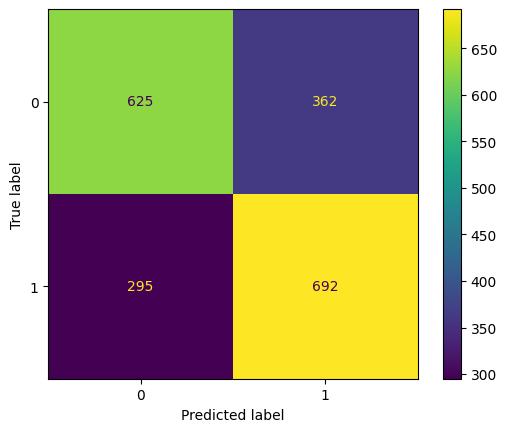

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       987
           1       0.66      0.70      0.68       987

    accuracy                           0.67      1974
   macro avg       0.67      0.67      0.67      1974
weighted avg       0.67      0.67      0.67      1974


Logistic Regression model - Test
Recall Score - :  0.6875
Jumlah class - :  Counter({0: 172, 1: 122}) 



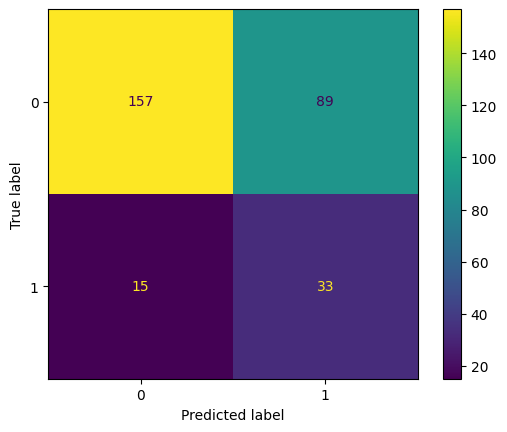

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       246
           1       0.27      0.69      0.39        48

    accuracy                           0.65       294
   macro avg       0.59      0.66      0.57       294
weighted avg       0.81      0.65      0.69       294



In [150]:
# Evaluasi model logistic Regression
print('Logistic Regression model - Train')

performance_check(log_regTuned, X_train_final, y_train)
print('')

print('Logistic Regression model - Test')
performance_check(log_regTuned, X_test_final, y_test)

KNN model - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



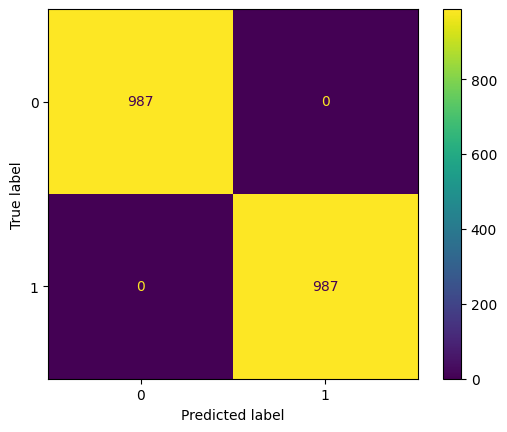

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


KNN model - Test
Recall Score - :  0.3958333333333333
Jumlah class - :  Counter({0: 226, 1: 68}) 



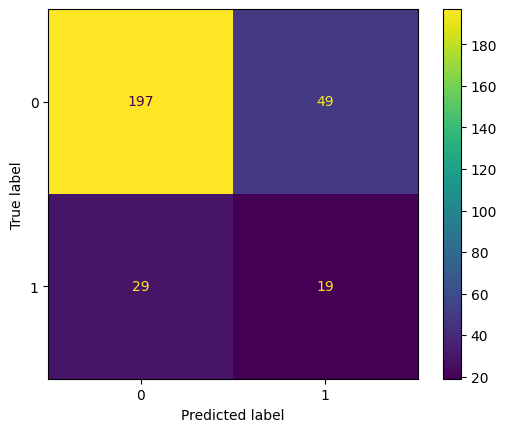

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       246
           1       0.28      0.40      0.33        48

    accuracy                           0.73       294
   macro avg       0.58      0.60      0.58       294
weighted avg       0.77      0.73      0.75       294



In [151]:
# Evaluasi model KNN
print('KNN model - Train')

performance_check(knn_tuned, X_train_final, y_train)
print('')

print('KNN model - Test')
performance_check(knn_tuned, X_test_final, y_test)

SVM classifier model - Train
Recall Score - :  0.8541033434650456
Jumlah class - :  Counter({1: 1075, 0: 899}) 



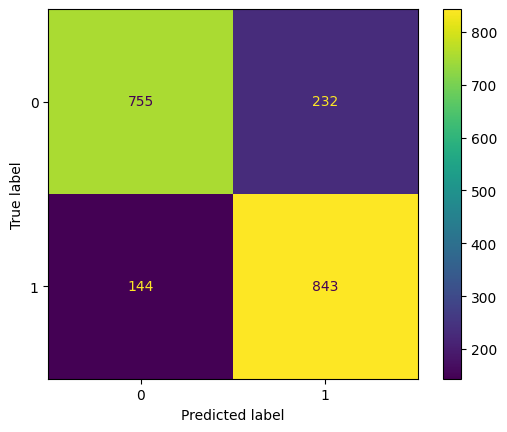

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       987
           1       0.78      0.85      0.82       987

    accuracy                           0.81      1974
   macro avg       0.81      0.81      0.81      1974
weighted avg       0.81      0.81      0.81      1974


SVM classifier model - Test
Recall Score - :  0.5625
Jumlah class - :  Counter({0: 203, 1: 91}) 



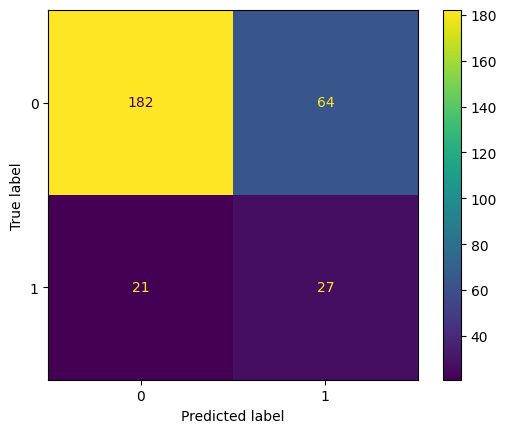

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       246
           1       0.30      0.56      0.39        48

    accuracy                           0.71       294
   macro avg       0.60      0.65      0.60       294
weighted avg       0.80      0.71      0.74       294



In [152]:
# Evaluasi model SVM classifier
print('SVM classifier model - Train')
performance_check(svc_tuned, X_train_final, y_train)
print('')

print('SVM classifier model - Test')
performance_check(svc_tuned, X_test_final, y_test)

Decision Tree - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



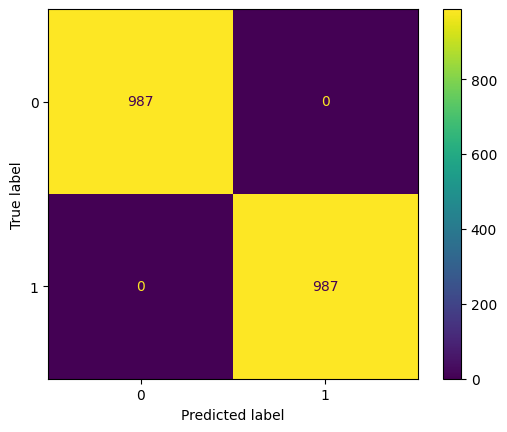

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


Decision Tree - Test
Recall Score - :  0.3125
Jumlah class - :  Counter({0: 241, 1: 53}) 



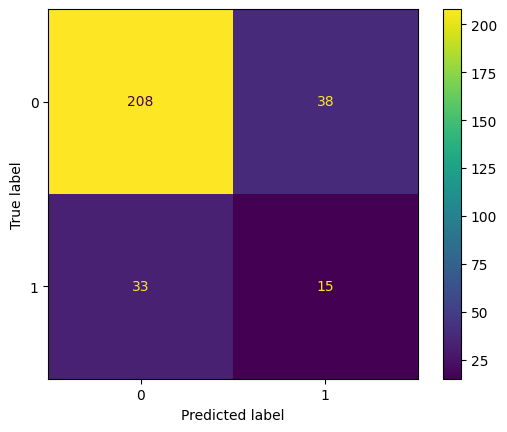

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       246
           1       0.28      0.31      0.30        48

    accuracy                           0.76       294
   macro avg       0.57      0.58      0.58       294
weighted avg       0.77      0.76      0.76       294



In [153]:
# Evaluasi model Decision Tree
print('Decision Tree - Train')
performance_check(dectree_tuned, X_train_final, y_train)
print('')

print('Decision Tree - Test')
performance_check(dectree_tuned, X_test_final, y_test)

Random forest classifier model - Train
Recall Score - :  0.9888551165146909
Jumlah class - :  Counter({0: 991, 1: 983}) 



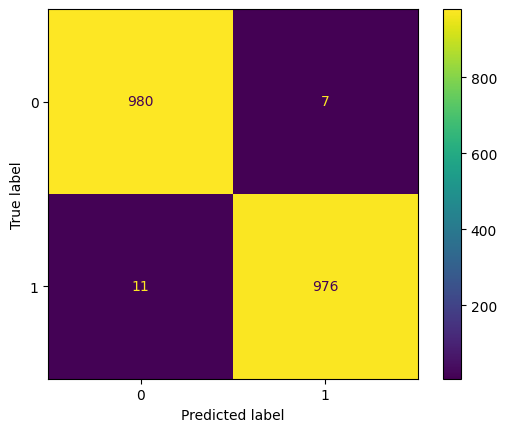

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       987
           1       0.99      0.99      0.99       987

    accuracy                           0.99      1974
   macro avg       0.99      0.99      0.99      1974
weighted avg       0.99      0.99      0.99      1974


Random forest classifier model - Test
Recall Score - :  0.2916666666666667
Jumlah class - :  Counter({0: 261, 1: 33}) 



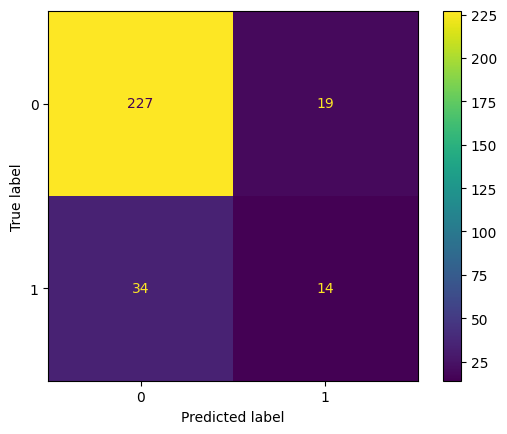

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       246
           1       0.42      0.29      0.35        48

    accuracy                           0.82       294
   macro avg       0.65      0.61      0.62       294
weighted avg       0.80      0.82      0.81       294



In [154]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(randfo_tuned, X_train_final, y_train,)
print('')

print('Random forest classifier model - Test')
performance_check(randfo_tuned, X_test_final, y_test)

Xgboost classifier - Train
Recall Score - :  1.0
Jumlah class - :  Counter({0: 987, 1: 987}) 



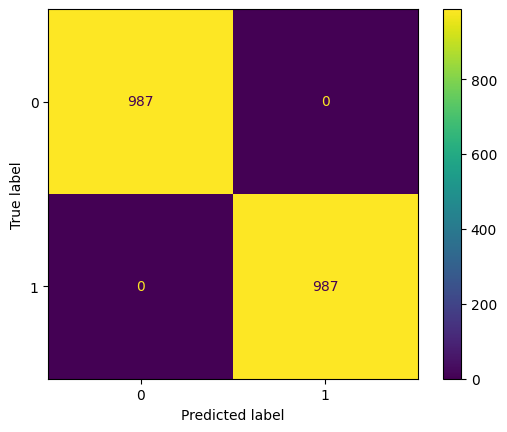

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       987

    accuracy                           1.00      1974
   macro avg       1.00      1.00      1.00      1974
weighted avg       1.00      1.00      1.00      1974


Xgboost classifier - Test
Recall Score - :  0.25
Jumlah class - :  Counter({0: 265, 1: 29}) 



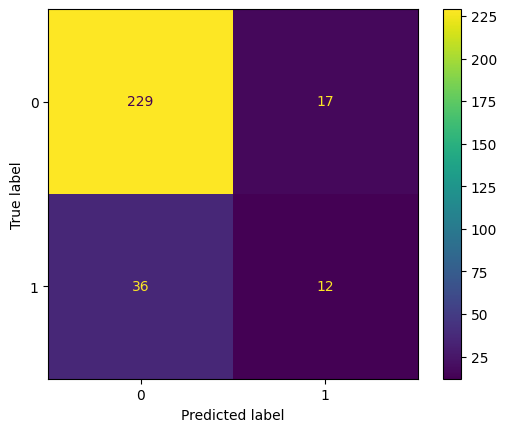

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       246
           1       0.41      0.25      0.31        48

    accuracy                           0.82       294
   macro avg       0.64      0.59      0.60       294
weighted avg       0.79      0.82      0.80       294



In [155]:
# Evaluasi model Xgboost
print('Xgboost classifier - Train')

performance_check(xgb_tuned, X_train_final, y_train)
print('')

print('Xgboost classifier - Test')
performance_check(xgb_tuned, X_test_final, y_test)

In [156]:
# Definisikan model evaluasi
models_tuning = {
    'Logistic Regression': log_regTuned,
    'K-Nearest Neighbors': knn_tuned,
    'Support Vector Classifier': svc_tuned,
    'Decision Tree': dectree_tuned,
    'Random Forest': randfo_tuned,
    'XGBoost': xgb_tuned
}

# Panggil fungsi perform_cross_validation
results = perform_cross_validation(models_tuning, X_train_final, y_train)

Logistic Regression - Recall score - All - Cross validation: [0.72020725 0.69902913 0.6453202  0.7393617  0.68527919]
Logistic Regression - Recall score - Mean - Cross Validation: 0.6978394934177713
Logistic Regression - Recall score - Std - Cross Validation: 0.03206825071325233

K-Nearest Neighbors - Recall score - All - Cross validation: [0.94300518 0.92718447 0.90147783 0.94148936 0.93908629]
K-Nearest Neighbors - Recall score - Mean - Cross Validation: 0.930448627199451
K-Nearest Neighbors - Recall score - Std - Cross Validation: 0.015518607272459498

Support Vector Classifier - Recall score - All - Cross validation: [0.84455959 0.83495146 0.80788177 0.82446809 0.81725888]
Support Vector Classifier - Recall score - Mean - Cross Validation: 0.8258239567114073
Support Vector Classifier - Recall score - Std - Cross Validation: 0.012895393347961755

Decision Tree - Recall score - All - Cross validation: [0.82901554 0.80582524 0.77339901 0.86170213 0.81218274]
Decision Tree - Recall sco

In [157]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, log_regTuned.predict(X_train_final), y_test, log_regTuned.predict(X_test_final), 'LogReg tuned')

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, knn_tuned.predict(X_train_final), y_test, knn_tuned.predict(X_test_final), 'KNN tuned')

# Melakukan laporan kinerja untuk model SVC
all_reports = performance_report(all_reports, y_train, svc_tuned.predict(X_train_final), y_test, svc_tuned.predict(X_test_final), 'SVC tuned')

# Melakukan laporan kinerja untuk model Decision Tree
all_reports = performance_report(all_reports, y_train, dectree_tuned.predict(X_train_final), y_test,  dectree_tuned.predict(X_test_final), 'Decision Tree tuned')

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, randfo_tuned.predict(X_train_final), y_test, randfo_tuned.predict(X_test_final), 'Random Forest tuned')

# Melakukan laporan kinerja untuk model XGBoost
all_reports = performance_report(all_reports, y_train, xgb_tuned.predict(X_train_final), y_test, xgb_tuned.predict(X_test_final), 'XGBoost tuned')

# Membuat DataFrame dari dictionary all_reports
df_report_model_tuning = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)

df_report_model_tuning


{'LogReg tuned': {'train - precision': 0.6565464895635673, 'train - recall': 0.7011144883485309, 'train - accuracy': 0.6671732522796353, 'train - f1_score': 0.6780989710926016, 'test - precision': 0.27049180327868855, 'test - recall': 0.6875, 'test - accuracy_score': 0.6462585034013606, 'test - f1_score': 0.38823529411764707}, 'KNN tuned': {'train - precision': 1.0, 'train - recall': 1.0, 'train - accuracy': 1.0, 'train - f1_score': 1.0, 'test - precision': 0.27941176470588236, 'test - recall': 0.3958333333333333, 'test - accuracy_score': 0.7346938775510204, 'test - f1_score': 0.3275862068965517}, 'SVC tuned': {'train - precision': 0.7841860465116279, 'train - recall': 0.8541033434650456, 'train - accuracy': 0.8095238095238095, 'train - f1_score': 0.8176527643064986, 'test - precision': 0.2967032967032967, 'test - recall': 0.5625, 'test - accuracy_score': 0.7108843537414966, 'test - f1_score': 0.38848920863309355}, 'Decision Tree tuned': {'train - precision': 1.0, 'train - recall': 1.0

LogReg tuned  KNN tuned  SVC tuned  \
train - precision          0.656546   1.000000   0.784186   
train - recall             0.701114   1.000000   0.854103   
train - accuracy           0.667173   1.000000   0.809524   
train - f1_score           0.678099   1.000000   0.817653   
test - precision           0.270492   0.279412   0.296703   
test - recall              0.687500   0.395833   0.562500   
test - accuracy_score      0.646259   0.734694   0.710884   
test - f1_score            0.388235   0.327586   0.388489   

                       Decision Tree tuned  Random Forest tuned  XGBoost tuned  
train - precision                 1.000000             0.992879       1.000000  
train - recall                    1.000000             0.988855       1.000000  
train - accuracy                  1.000000             0.990881       1.000000  
train - f1_score                  1.000000             0.990863       1.000000  
test - precision                  0.283019             0.424242       0.413793  
test - recall                     0.312500             0.291667       0.250000  
test - accuracy_score             0.758503             0.819728       0.819728  
test - f1_score                   0.297030             0.345679       0.311688

In [158]:
df_report_base_model

LogReg       KNN       SVC  Decision Tree  \
train - precision      0.650190  0.835544  0.695305       1.000000   
train - recall         0.693009  0.957447  0.705167       1.000000   
train - accuracy       0.660081  0.884498  0.698075       1.000000   
train - f1_score       0.670917  0.892351  0.700201       1.000000   
test - precision       0.268293  0.259740  0.285714       0.290909   
test - recall          0.687500  0.416667  0.583333       0.333333   
test - accuracy_score  0.642857  0.710884  0.693878       0.758503   
test - f1_score        0.385965  0.320000  0.383562       0.310680   

                       Random Forest   XGBoost  
train - precision           1.000000  1.000000  
train - recall              1.000000  1.000000  
train - accuracy            1.000000  1.000000  
train - f1_score            1.000000  1.000000  
test - precision            0.480000  0.428571  
test - recall               0.250000  0.250000  
test - accuracy_score       0.833333  0.823129  
test - f1_score             0.328767  0.315789

In [159]:


def compare_performance(y_test, y_pred_base, y_pred_tuned):
    """
    Membandingkan kinerja model sebelum (base model) dan sesudah (model tuned) tuning.
    
    Parameters:
        y_test : array-like, shape (n_samples,)
            Label yang sebenarnya dari data uji.
        y_pred_base : array-like, shape (n_samples,)
            Hasil prediksi model base.
        y_pred_tuned : array-like, shape (n_samples,)
            Hasil prediksi model yang telah dituned.
    
    Returns:
        results : dict
            Dictionary berisi hasil perbandingan kinerja model.
    """
    results = {
        'Accuracy Base Model': accuracy_score(y_test, y_pred_base),
        'Precision Base Model': precision_score(y_test, y_pred_base),
        'Recall Base Model': recall_score(y_test, y_pred_base),
        'F1 Score Base Model': f1_score(y_test, y_pred_base),
        'Accuracy Tuned Model': accuracy_score(y_test, y_pred_tuned),
        'Precision Tuned Model': precision_score(y_test, y_pred_tuned),
        'Recall Tuned Model': recall_score(y_test, y_pred_tuned),
        'F1 Score Tuned Model': f1_score(y_test, y_pred_tuned)
    }
    
    return results

# Contoh penggunaan:
# Membandingkan kinerja
comparison_results = compare_performance(y_test, base_logReg.predict(X_test_final), log_regTuned.predict(X_test_final))
print(comparison_results)

comparison_results_df = pd.DataFrame([comparison_results])
comparison_results_df

{'Accuracy Base Model': 0.6428571428571429, 'Precision Base Model': 0.2682926829268293, 'Recall Base Model': 0.6875, 'F1 Score Base Model': 0.38596491228070173, 'Accuracy Tuned Model': 0.6462585034013606, 'Precision Tuned Model': 0.27049180327868855, 'Recall Tuned Model': 0.6875, 'F1 Score Tuned Model': 0.38823529411764707}


Accuracy Base Model  Precision Base Model  Recall Base Model  \
0             0.642857              0.268293             0.6875   

   F1 Score Base Model  Accuracy Tuned Model  Precision Tuned Model  \
0             0.385965              0.646259               0.270492   

   Recall Tuned Model  F1 Score Tuned Model  
0              0.6875              0.388235

Overall Logistic regression Best mode, karena data tampak kebanyakan adalah linear

---

## Build Model with Pipeline

In [160]:
# Spliting data
X_train_pipe, X_test_pipe ,y_train_pipe,y_test_pipe = train_test_split(X,y, test_size=0.3, random_state=22)

In [161]:
# handling  outlier

# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=listCols_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped_pipe = winsorizer_normal_dist.fit_transform(X_train_pipe)

# Transforming X_test
X_test_capped_pipe = winsorizer_normal_dist.transform(X_test_pipe)

In [162]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=listCols_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_pipe = winsorizer_skewed.fit_transform(X_train_capped_pipe)

# Transforming X_test
X_test_pipe = winsorizer_skewed.transform(X_test_capped_pipe)

In [163]:
list_cat

['Department', 'JobRole', 'JobSatisfaction', 'MaritalStatus']

In [164]:
list_num

['Age',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrentManager']

In [165]:
# Membuat transformer pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())                 # standarisasi fitur
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ord_encodeRank)                     # encoding one-hot
])


# Gabungkan transformer untuk semua kolom menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list_num),
        ('cat', categorical_transformer, list_cat)
    ])


# Gabungkan preprocessor dengan SMOTE dan model classifier dalam pipeline
log_regPipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', overSampler),
    ('log_reg', log_regTuned)  # Model 
])

In [166]:
# fit training model
log_regPipe.fit(X_train_pipe,y_train_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'MonthlyIncome',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsWithCurrentManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OrdinalEncoder(categories=[['Research '
                                                                                               '& '
                                                                                               'Development',
                                                                                               'Sales',
                                                                                               'Human '
                                                                                               'Resources'],
                                                                                              ['Laborato...
                                                                                               'Research '
                                                                                               'Director',
                                                                                               'Research '
                                                                                               'Scientist',
                                                                                               'Manager',
                                                                                               'Healthcare '
                                                                                               'Representative',
                                                                                               'Human '
                                                                                               'Resources'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High'],
                                                                                              ['Married',
                                                                                               'Divorced',
                                                                                               'Single']]))]),
                                                  ['Department', 'JobRole',
                                                   'JobSatisfaction',
                                                   'MaritalStatus'])])),
                ('smote', SMOTE(random_state=22, sampling_strategy='minority')),
                ('log_reg', LogisticRegression(C=0.1, random_state=22))])

In [167]:
# Predict 
pred_Logreg = log_regPipe.predict(X_test_pipe)
pred_Logreg

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [168]:
Counter(y_test_pipe)

Counter({0: 380, 1: 61})

In [169]:
Counter(pred_Logreg)

Counter({0: 276, 1: 165})

In [170]:
# scoring

recall = recall_score(y_test_pipe, pred_Logreg)
print(recall)

0.6229508196721312


# vii. Model Saving

In [178]:
with open('temp_classifcation_model/list_num_cols.txt', 'w') as file_1:
  json.dump(list_num, file_1)

with open('temp_classifcation_model/list_cat_cols.txt', 'w') as file_2:
  json.dump(list_cat, file_2)

with open('temp_classifcation_model/scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('temp_classifcation_model/encoder.pkl', 'wb') as file_4:
  pickle.dump(ord_encodeRank, file_4)

with open('temp_classifcation_model/model_logreg.pkl', 'wb') as file_5:
  pickle.dump(log_regTuned, file_5)

with open('temp_classifcation_model/model_knn.pkl', 'wb') as file_6:
  pickle.dump(knn_tuned, file_6)

with open('temp_classifcation_model/model_svc.pkl', 'wb') as file_7:
  pickle.dump(svc_tuned, file_7)

with open('temp_classifcation_model/model_dectree.pkl', 'wb') as file_8:
  pickle.dump(dectree_tuned, file_8)

with open('temp_classifcation_model/model_randfo.pkl', 'wb') as file_9:
  pickle.dump(randfo_tuned, file_9)

with open('temp_classifcation_model/model_xgb.pkl', 'wb') as file_10:
  pickle.dump(xgb_tuned, file_10)


with open('temp_classifcation_model/log_regPipe.pkl', 'wb') as file_11:
  pickle.dump(log_regPipe, file_11)

---

# viii. Model Inference

In [172]:
# Load model and other files

with open('temp_classifcation_model/list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('temp_classifcation_model/list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("temp_classifcation_model/model_dectree.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("temp_classifcation_model/scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

with open("temp_classifcation_model/encoder.pkl", "rb") as file_5:
  encoder = pickle.load(file_5)

In [173]:
df.tail()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
1465   44        No  Travel_Rarely  Research & Development                10   
1466   31        No     Non-Travel                   Sales                 2   
1467   30        No  Travel_Rarely         Human Resources                 1   
1468   50        No  Travel_Rarely  Research & Development                 9   
1469   58       Yes  Travel_Rarely  Research & Development                 2   

      Education EducationField  Gender                    JobRole  \
1465          4          Other    Male  Healthcare Representative   
1466          4  Life Sciences  Female            Sales Executive   
1467          3  Life Sciences    Male            Human Resources   
1468          3  Life Sciences    Male      Laboratory Technician   
1469          4  Life Sciences    Male          Research Director   

     JobSatisfaction  ... MonthlyIncome  NumCompaniesWorked  \
1465       Very High  ...          6465                   2   
1466            High  ...          9852                   1   
1467            High  ...          2064                   0   
1468       Very High  ...          2380                   4   
1469          Medium  ...         19246                   7   

      PercentSalaryHike  PerformanceRating  TotalWorkingYears  \
1465                 13                  3                  9   
1466                 19                  3                 10   
1467                 21                  4                  6   
1468                 18                  3                  8   
1469                 12                  3                 40   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
1465             Best              4                   2   
1466             Good             10                   8   
1467             Best              5                   3   
1468           Better              1                   0   
1469           Better             31                  15   

      YearsSinceLastPromotion  YearsWithCurrentManager  
1465                        1                        3  
1466                        9                        6  
1467                        1                        3  
1468                        0                        0  
1469                       13                        8  

[5 rows x 21 columns]

In [174]:
data_inf = [
    {
        'Age':np.random.randint(18,59), 
        'BusinessTravel':np.random.choice(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently']),
        'Department':np.random.choice(['Research & Development', 'Sales', 'Human Resources']),
        'DistanceFromHome':np.random.randint(2,29),
        'Education':np.random.randint(1,5),
        'EducationField':np.random.choice( ['Marketing','Technical Degree','Life Sciences','Medical','Human Resources','Other']), 
        'Gender':np.random.choice(['Female','Male']), 
        'JobRole':np.random.choice(['Sales Executive','Manufacturing Director','Healthcare Representative' ,'Research Scientist',
                                'Laboratory Technician', 'Human Resources','Sales Representative','Research Director', 'Manager']), 
        'JobSatisfaction':np.random.choice(['Low','Medium','High','Very High']),
        'MaritalStatus':np.random.choice(['Divorced','Married','Single']),
        'MonthlyIncome':np.random.randint(1000, 200000), 
        'NumCompaniesWorked':np.random.randint(1,10),
        'PercentSalaryHike':np.random.randint(10,25), 
        'PerformanceRating':np.random.randint(3,4), 
        'TotalWorkingYears':np.random.randint(1,35),
        'WorkLifeBalance':np.random.choice(['Better','Bad','Good','Best']), 
        'YearsAtCompany':np.random.randint(1,35), 
        'YearsInCurrentRole':np.random.randint(1,17),
        'YearsSinceLastPromotion':np.random.randint(1,15), 
        'YearsWithCurrentManager':np.random.randint(1,17)
    } for i in range(5)  # Adjust the range according to the desired number of rows
]

# Convert to DataFrame
data_inf = pd.DataFrame(data_inf)

# Display the DataFrame
data_inf.head()

Age     BusinessTravel              Department  DistanceFromHome  \
0   48  Travel_Frequently                   Sales                12   
1   32      Travel_Rarely                   Sales                12   
2   34         Non-Travel         Human Resources                16   
3   57      Travel_Rarely  Research & Development                 7   
4   34  Travel_Frequently                   Sales                25   

   Education   EducationField  Gender            JobRole JobSatisfaction  \
0          3    Life Sciences  Female            Manager          Medium   
1          2        Marketing  Female    Sales Executive       Very High   
2          4  Human Resources    Male    Human Resources            High   
3          3            Other    Male    Sales Executive       Very High   
4          1    Life Sciences    Male  Research Director          Medium   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0      Divorced         165474                   7                 12   
1        Single         193661                   7                 22   
2      Divorced         193477                   6                 10   
3      Divorced         158460                   8                 21   
4        Single         193248                   8                 13   

   PerformanceRating  TotalWorkingYears WorkLifeBalance  YearsAtCompany  \
0                  3                 34            Best              23   
1                  3                 13             Bad              19   
2                  3                 19            Good              23   
3                  3                 30             Bad               3   
4                  3                  1            Best              13   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrentManager  
0                   7                        9                        1  
1                  16                        3                       15  
2                  14                        3                        2  
3                  14                       13                       11  
4                  10                        7                        2

#### Splitting Dataset Into Categorical and Numerical Columns

In [175]:
#Splitting the dataset into categorical and numerical columns

data_infNum = data_inf[list_num_col]
data_infCat = data_inf[list_cat_col]

#### Scaling and Encoding

In [176]:
# Scaling the numerical features, encoding the categorical features, and concatenating them back again
data_inf_scaled_num = scaler.transform(data_infNum)
data_inf_cat_encoded = ord_encodeRank.transform(data_infCat)
data_inference_final = np.concatenate([data_inf_scaled_num, data_inf_cat_encoded], axis = 1)

#### Predicting

In [177]:
#Predicting

y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([0, 1, 0, 0, 1], dtype=int64)

# ix. Kesimpulan